In [11]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

In [12]:
df150 = pd.read_csv('Df50.csv')
df200 = pd.read_csv('Df108.csv')
df220 = pd.read_csv('Df158.csv')
df270 = pd.read_csv('Df208.csv')
df320 = pd.read_csv('Df260.csv')
df370 = pd.read_csv('Df311.csv')
df420 = pd.read_csv('Df362.csv')
df470 = pd.read_csv('Df413.csv')
df520 = pd.read_csv('Df464.csv')
df515 = pd.read_csv('Df515.csv')
df566 = pd.read_csv('Df566.csv')
df617 = pd.read_csv('Df617.csv')
df668 = pd.read_csv('Df668.csv')
df719 = pd.read_csv('Df719.csv')
df770 = pd.read_csv('Df770.csv')
df821 = pd.read_csv('Df821.csv')
df872 = pd.read_csv('Df872.csv')
df923 = pd.read_csv('Df923.csv')
df974 = pd.read_csv('Df974.csv')
df1000 = pd.read_csv('Df1000.csv')

In [13]:
full_df = pd.concat([df150, df200, df220, df270, df320, df370, df420, df470, df520, df515, df566, df617, df668, df719, df770, df821, df872, df923, df974, df1000])

In [14]:
full_df.head()

,building_type,zone,year,n_floor,total_floor,area,kchn_area,ceiling,toilet,parking,rough_finish,num_room,price
0,монолитный,"\nАстана, Сарыарка р-н\nпоказать на карте\n",2006,6,16,11,0,2.8м,1,1,0,4,52000000
1,монолитный,"\nАстана, Алматы р-н\nпоказать на карте\n",2017,3,18,75,28 м²,3м,0,1,0,3,37000000
2,панельный,"\nАстана, Алматы р-н\nпоказать на карте\n",1979,1,5,30,0,2.5м,0,0,0,1,13500000
3,монолитный,"\nАстана, Есильский р-н\nпоказать на карте\n",2022,-,-,48,0,3м,0,1,0,1,24000000
4,монолитный,"\nАстана, Сарыарка р-н\nпоказать на карте\n",2006,7,16,93,0,2.7м,1,0,0,3,39500000


In [15]:
len(full_df)

18773

In [16]:
new_full_df = full_df.drop_duplicates()
len(new_full_df)

13081

In [17]:
new_full_df.drop('kchn_area', inplace=True, axis=1)

C:\Users\rusya\AppData\Local\Temp\ipykernel_8584\791556005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_full_df.drop('kchn_area', inplace=True, axis=1)


In [18]:
new_full_df.head()

,building_type,zone,year,n_floor,total_floor,area,ceiling,toilet,parking,rough_finish,num_room,price
0,монолитный,"\nАстана, Сарыарка р-н\nпоказать на карте\n",2006,6,16,11,2.8м,1,1,0,4,52000000
1,монолитный,"\nАстана, Алматы р-н\nпоказать на карте\n",2017,3,18,75,3м,0,1,0,3,37000000
2,панельный,"\nАстана, Алматы р-н\nпоказать на карте\n",1979,1,5,30,2.5м,0,0,0,1,13500000
3,монолитный,"\nАстана, Есильский р-н\nпоказать на карте\n",2022,-,-,48,3м,0,1,0,1,24000000
4,монолитный,"\nАстана, Сарыарка р-н\nпоказать на карте\n",2006,7,16,93,2.7м,1,0,0,3,39500000


In [19]:
new_full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13081 entries, 0 to 211
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   building_type  13081 non-null  object
 1   zone           13081 non-null  object
 2   year           13081 non-null  int64 
 3   n_floor        13081 non-null  object
 4   total_floor    13081 non-null  object
 5   area           13081 non-null  int64 
 6   ceiling        13081 non-null  object
 7   toilet         13081 non-null  int64 
 8   parking        13081 non-null  int64 
 9   rough_finish   13081 non-null  int64 
 10  num_room       13081 non-null  int64 
 11  price          13081 non-null  object
dtypes: int64(6), object(6)
memory usage: 1.3+ MB


In [20]:
len(new_full_df)

13081

In [21]:
imputer = SimpleImputer(strategy='mean')

n_floor_df = new_full_df['n_floor']
n_floor_df.replace('-', np.nan, inplace=True)
n_floor_df = n_floor_df.values.reshape(-1, 1)

df_imputed_floor = pd.DataFrame(imputer.fit_transform(n_floor_df), columns=['n_floor'])

new_full_df['n_floor'] = df_imputed_floor

C:\Users\rusya\AppData\Local\Temp\ipykernel_8584\3279000163.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_floor_df.replace('-', np.nan, inplace=True)
C:\Users\rusya\AppData\Local\Temp\ipykernel_8584\3279000163.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_full_df['n_floor'] = df_imputed_floor


In [22]:
tf_df = new_full_df['total_floor']
tf_df.replace('-', np.nan, inplace=True)
tf_df = tf_df.values.reshape(-1, 1)

tf_imputed = pd.DataFrame(imputer.fit_transform(tf_df), columns=['total_floor'])

new_full_df['total_floor'] = tf_imputed

C:\Users\rusya\AppData\Local\Temp\ipykernel_8584\1587046646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf_df.replace('-', np.nan, inplace=True)
C:\Users\rusya\AppData\Local\Temp\ipykernel_8584\1587046646.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_full_df['total_floor'] = tf_imputed


In [23]:
imputer_mode = SimpleImputer(strategy='mode')

tf_df = new_full_df['total_floor']
tf_df.replace('-', np.nan, inplace=True)
tf_df = tf_df.values.reshape(-1, 1)

tf_imputed = pd.DataFrame(imputer.fit_transform(tf_df), columns=['total_floor'])

new_full_df['total_floor'] = tf_imputed

C:\Users\rusya\AppData\Local\Temp\ipykernel_8584\791743869.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf_df.replace('-', np.nan, inplace=True)
C:\Users\rusya\AppData\Local\Temp\ipykernel_8584\791743869.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_full_df['total_floor'] = tf_imputed


In [24]:
new_full_df['ceiling'] = new_full_df['ceiling'].replace('-','2.8м')
new_full_df['ceiling'] = new_full_df['ceiling'].str.slice(stop=-1).astype(float)

C:\Users\rusya\AppData\Local\Temp\ipykernel_8584\295378264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_full_df['ceiling'] = new_full_df['ceiling'].replace('-','2.8м')
C:\Users\rusya\AppData\Local\Temp\ipykernel_8584\295378264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_full_df['ceiling'] = new_full_df['ceiling'].str.slice(stop=-1).astype(float)


In [25]:
new_full_df.building_type.value_counts()

монолитный    5944
кирпичный     5611
-              984
панельный      542
Name: building_type, dtype: int64

In [26]:
new_full_df['building_type'].replace('-', 'монолитный', inplace=True)

C:\Users\rusya\AppData\Local\Temp\ipykernel_8584\542416297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_full_df['building_type'].replace('-', 'монолитный', inplace=True)


In [27]:
zone_tst = new_full_df.zone.str.replace('р-н\nпоказать на карте\n', '')
zone_tst = zone_tst.str.replace('\nАстана, ', '')
zone_tst = zone_tst.str.replace(' ', '')
zone_tst = zone_tst.str.replace('\nпоказатьнакарте\n', '')
new_full_df['zone'] = zone_tst

C:\Users\rusya\AppData\Local\Temp\ipykernel_8584\2419589189.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_full_df['zone'] = zone_tst


In [28]:
new_full_df['zone'] = new_full_df['zone'].replace('\nАстана','Есильский')

C:\Users\rusya\AppData\Local\Temp\ipykernel_8584\3951318408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_full_df['zone'] = new_full_df['zone'].replace('\nАстана','Есильский')


In [29]:
new_full_df.zone.value_counts()

Есильский      6994
Алматы         3801
Сарыарка       1533
р-нБайконур     753
Name: zone, dtype: int64

In [30]:
len(new_full_df)

13081

In [31]:
newdf_enc = pd.get_dummies(new_full_df, columns=['building_type', 'zone'])

# print the encoded dataframe
newdf_enc.head()

,year,n_floor,total_floor,area,ceiling,toilet,parking,rough_finish,num_room,price,building_type_кирпичный,building_type_монолитный,building_type_панельный,zone_Алматы,zone_Есильский,zone_Сарыарка,zone_р-нБайконур
0,2006,6.000000,16.000000,11,2.8,1,1,0,4,52000000,0,1,0,0,0,1,0
1,2017,3.000000,18.000000,75,3.0,0,1,0,3,37000000,0,1,0,1,0,0,0
2,1979,1.000000,5.000000,30,2.5,0,0,0,1,13500000,0,0,1,1,0,0,0
3,2022,4.912506,9.846911,48,3.0,0,1,0,1,24000000,0,1,0,0,1,0,0
4,2006,7.000000,16.000000,93,2.7,1,0,0,3,39500000,0,1,0,0,0,1,0


In [32]:
# assuming the column name is 'my_column'
price_df = newdf_enc['price']

# remove the first 3 characters if they are strings
price_df = price_df.apply(lambda x: int(x[3:]) if isinstance(x, str) and x.startswith('от') else x)

# check the datatype of the column after conversion
print(price_df.head())



0    52000000
1    37000000
2    13500000
3    24000000
4    39500000
Name: price, dtype: object


In [33]:
newdf_enc['price'] = price_df

In [34]:
newdf_enc['price'] = pd.to_numeric(newdf_enc['price'])

In [35]:
newdf_enc.corr()

,year,n_floor,total_floor,area,ceiling,toilet,parking,rough_finish,num_room,price,building_type_кирпичный,building_type_монолитный,building_type_панельный,zone_Алматы,zone_Есильский,zone_Сарыарка,zone_р-нБайконур
year,1.000000,-0.002032,0.004096,0.031029,0.093067,0.029269,0.281535,0.241555,-0.102777,0.080996,-0.006991,0.208356,-0.504460,-0.075673,0.380192,-0.251330,-0.319601
n_floor,-0.002032,1.000000,-0.057227,-0.003033,0.004681,0.016935,-0.000077,-0.006796,-0.003159,-0.001246,0.003621,-0.004417,0.002070,-0.004588,0.005174,-0.005684,0.005713
total_floor,0.004096,-0.057227,1.000000,-0.005939,0.000392,-0.005646,-0.004530,-0.016639,0.016328,0.007239,0.002518,0.004577,-0.017717,0.005735,-0.012973,0.013431,-0.001944
area,0.031029,-0.003033,-0.005939,1.000000,-0.031957,-0.053772,-0.041955,-0.008224,0.049415,-0.156435,-0.008670,0.013159,-0.011424,0.001751,0.025204,-0.025294,-0.022458
ceiling,0.093067,0.004681,0.000392,-0.031957,1.000000,0.044209,0.066867,0.050331,0.064731,0.080533,0.029323,-0.006467,-0.056623,-0.053858,0.088197,-0.040406,-0.028090
toilet,0.029269,0.016935,-0.005646,-0.053772,0.044209,1.000000,0.163317,0.043677,0.364889,0.267320,-0.053239,0.076386,-0.059094,-0.016964,0.051648,-0.044907,-0.015523
parking,0.281535,-0.000077,-0.004530,-0.041955,0.066867,0.163317,1.000000,0.100003,0.061564,0.150045,-0.119332,0.188758,-0.176388,-0.027491,0.162295,-0.153611,-0.081840
rough_finish,0.241555,-0.006796,-0.016639,-0.008224,0.050331,0.043677,0.100003,1.000000,-0.094451,-0.069233,0.040104,-0.012157,-0.069148,-0.022083,0.077864,-0.040918,-0.067193
num_room,-0.102777,-0.003159,0.016328,0.049415,0.064731,0.364889,0.061564,-0.094451,1.000000,0.645568,-0.097069,0.098820,-0.006430,-0.043428,0.068460,-0.055700,0.014966
price,0.080996,-0.001246,0.007239,-0.156435,0.080533,0.267320,0.150045,-0.069233,0.645568,1.000000,-0.095856,0.128860,-0.084675,-0.076317,0.165358,-0.109110,-0.054675


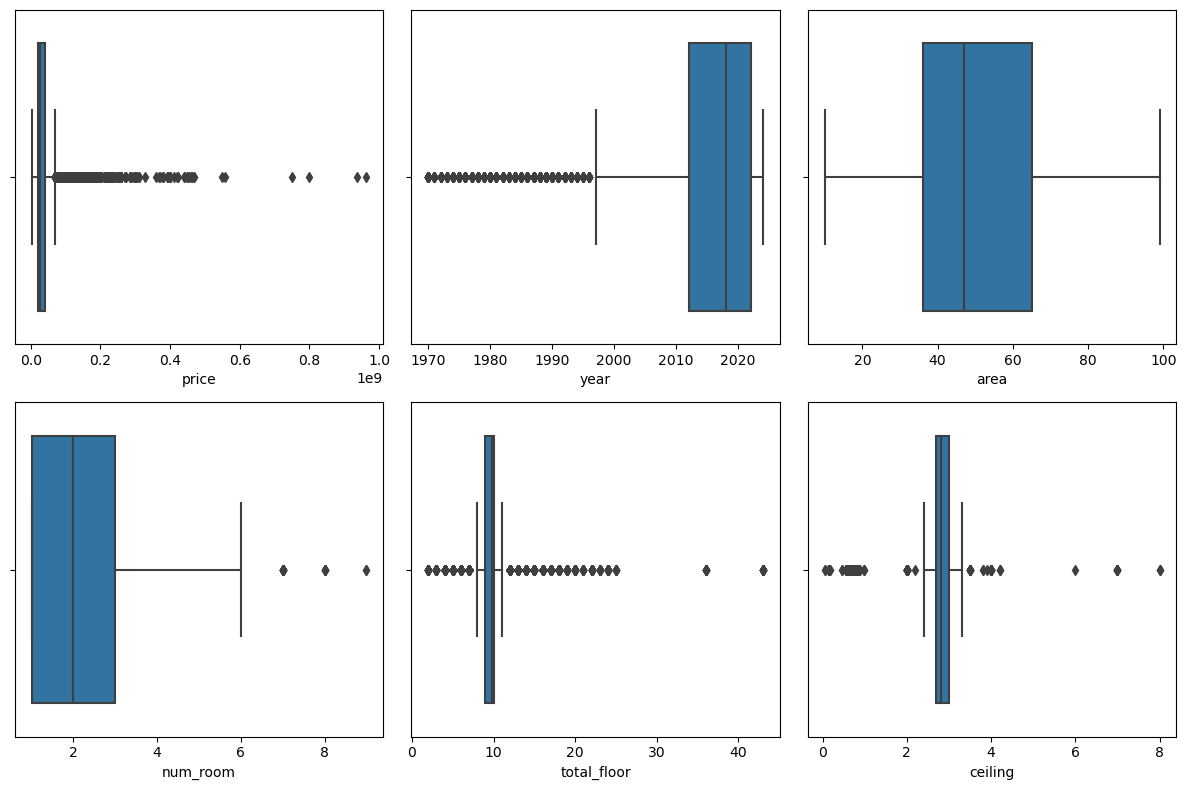

In [36]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Create a boxplot of each variable in a different subplot
sns.boxplot(x='price', data=newdf_enc, ax=axs[0, 0])
sns.boxplot(x='year', data=newdf_enc, ax=axs[0, 1])
sns.boxplot(x='area', data=newdf_enc, ax=axs[0, 2])
sns.boxplot(x='num_room', data=newdf_enc, ax=axs[1, 0])
sns.boxplot(x='total_floor', data=newdf_enc, ax=axs[1, 1])
sns.boxplot(x='ceiling', data=newdf_enc, ax=axs[1, 2])

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

In [37]:
Q1 = newdf_enc.year.quantile(0.25)
Q3 = newdf_enc.year.quantile(0.75)
IQR = Q3 - Q1
housing = newdf_enc[(newdf_enc.year >= Q1 - 1.5*IQR) & (newdf_enc.year <= Q3 + 1.5*IQR)]

In [45]:
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

In [39]:
Q1 = housing.ceiling.quantile(0.25)
Q3 = housing.ceiling.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.ceiling >= Q1 - 1.5*IQR) & (housing.ceiling <= Q3 + 1.5*IQR)]

In [40]:
Q1 = housing.total_floor.quantile(0.25)
Q3 = housing.total_floor.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.total_floor >= Q1 - 1.5*IQR) & (housing.total_floor <= Q3 + 1.5*IQR)]

In [46]:
len(housing)

7060

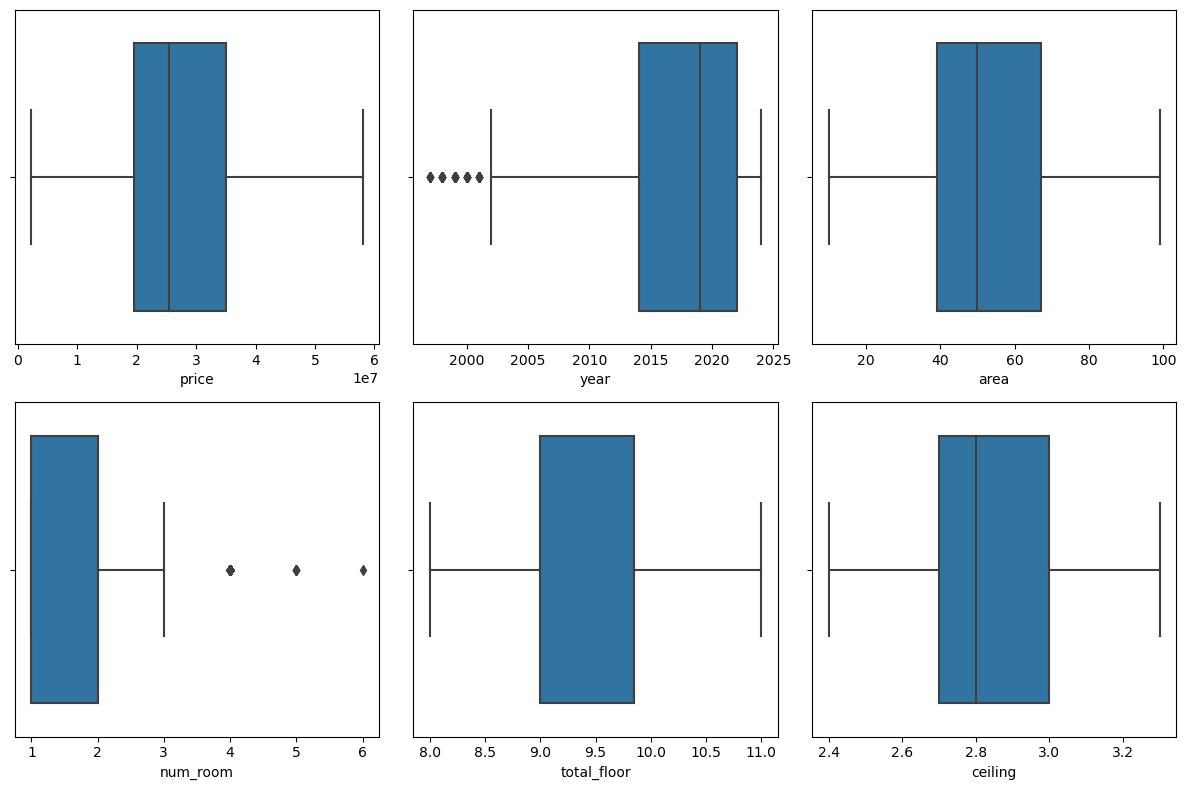

In [47]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Create a boxplot of each variable in a different subplot
sns.boxplot(x='price', data=housing, ax=axs[0, 0])
sns.boxplot(x='year', data=housing, ax=axs[0, 1])
sns.boxplot(x='area', data=housing, ax=axs[0, 2])
sns.boxplot(x='num_room', data=housing, ax=axs[1, 0])
sns.boxplot(x='total_floor', data=housing, ax=axs[1, 1])
sns.boxplot(x='ceiling', data=housing, ax=axs[1, 2])

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

In [40]:
housing.corr()

,year,n_floor,total_floor,area,ceiling,toilet,parking,rough_finish,num_room,price,building_type_кирпичный,building_type_монолитный,building_type_панельный,zone_Алматы,zone_Есильский,zone_Сарыарка,zone_р-нБайконур
year,1.000000,-0.003863,0.005483,-0.038119,0.289748,-0.085246,0.135353,0.320892,-0.225268,-0.110172,-0.073257,0.084032,-0.057702,-0.110276,0.342540,-0.225341,-0.231311
n_floor,-0.003863,1.000000,0.025774,-0.015068,0.024008,0.012419,-0.004777,-0.007094,0.009731,0.026796,0.013972,-0.012984,-0.005132,-0.011466,0.011171,-0.012273,0.017484
total_floor,0.005483,0.025774,1.000000,-0.006454,0.005162,0.014398,0.000471,0.000949,-0.007095,-0.001432,-0.000335,0.001616,-0.006794,-0.016110,0.000959,0.025412,-0.006300
area,-0.038119,-0.015068,-0.006454,1.000000,-0.011742,0.096950,-0.009478,-0.035613,0.413250,0.381555,-0.048944,0.051510,-0.013982,-0.001008,0.064353,-0.073090,-0.039094
ceiling,0.289748,0.024008,0.005162,-0.011742,1.000000,0.053394,0.203518,0.179290,0.011339,0.218521,-0.018540,0.027227,-0.046215,-0.141475,0.239599,-0.125325,-0.070066
toilet,-0.085246,0.012419,0.014398,0.096950,0.053394,1.000000,0.083478,0.053086,0.335392,0.359789,-0.045181,0.047752,-0.013981,-0.000315,-0.005231,-0.000404,0.013928
parking,0.135353,-0.004777,0.000471,-0.009478,0.203518,0.083478,1.000000,0.085957,-0.025828,0.123570,-0.125022,0.134261,-0.049946,-0.015513,0.093545,-0.110184,-0.019700
rough_finish,0.320892,-0.007094,0.000949,-0.035613,0.179290,0.053086,0.085957,1.000000,-0.078547,-0.118507,0.017536,-0.013221,-0.022751,-0.030089,0.074421,-0.035187,-0.058157
num_room,-0.225268,0.009731,-0.007095,0.413250,0.011339,0.335392,-0.025828,-0.078547,1.000000,0.752504,-0.069146,0.070417,-0.007266,-0.007050,0.003086,-0.027527,0.050957
price,-0.110172,0.026796,-0.001432,0.381555,0.218521,0.359789,0.123570,-0.118507,0.752504,1.000000,-0.171854,0.176293,-0.024851,-0.126127,0.190246,-0.123358,0.011915


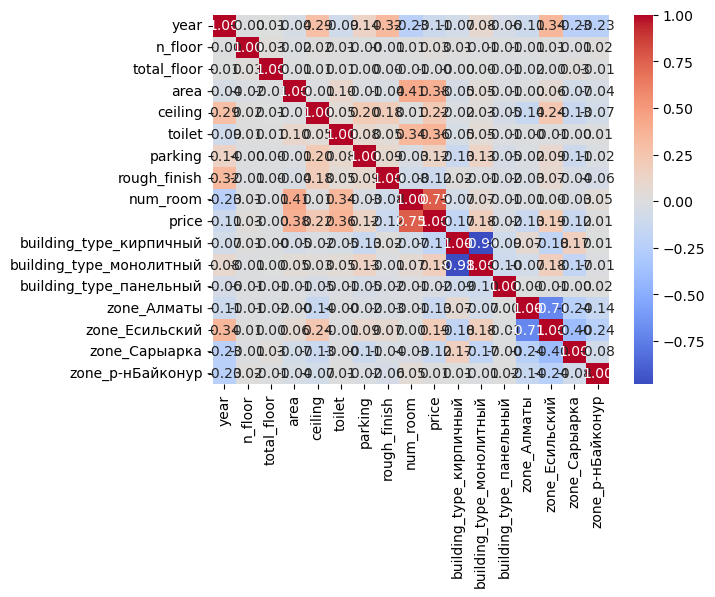

In [187]:
correlation_matrix = housing.corr()

# Create the heatmap with correlation coefficients
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")

# Display the heatmap
plt.show()
plt.close()

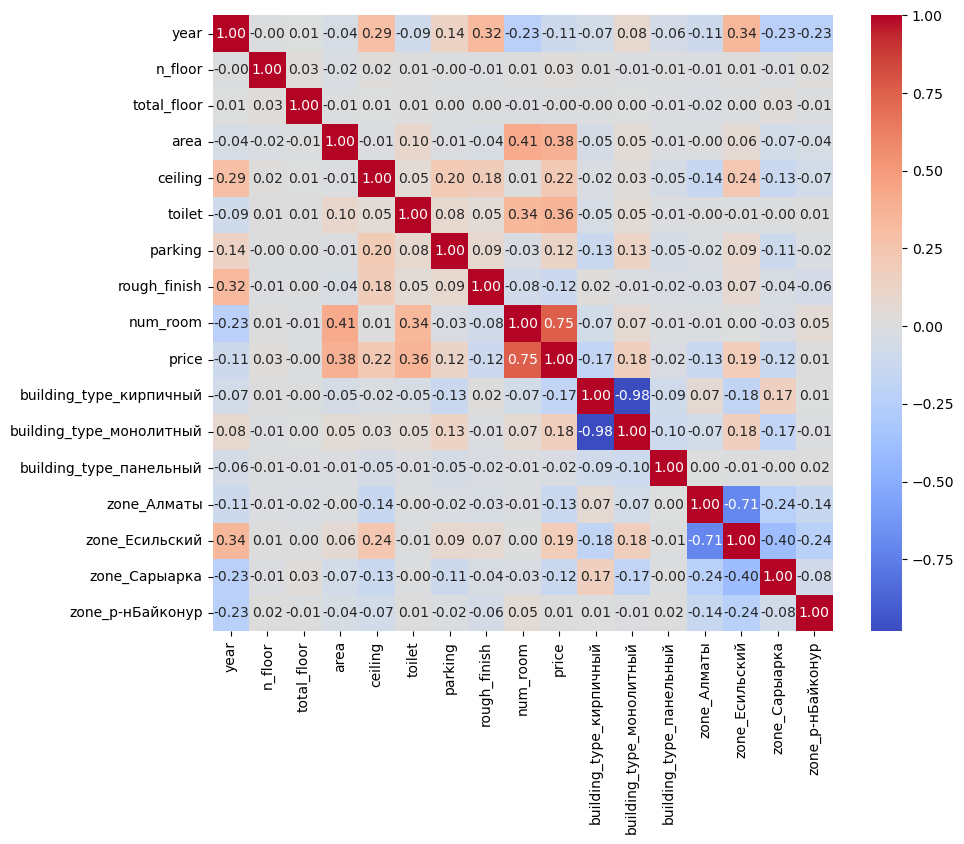

In [188]:
correlation_matrix = housing.corr()

# Create the heatmap with correlation coefficients
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 10})  # Adjust the font size

# Display the heatmap
plt.show()
plt.close()

In [191]:
# Calculate the correlation matrix
correlation_matrix = housing.corr()

# Get the correlation values with the target variable
target_correlations = correlation_matrix['price'].sort_values(ascending=False)

# Exclude the target variable itself
target_correlations = target_correlations.drop('price')

# Display the top correlated values with the target variable
top_correlations = target_correlations.head(5)
print("Top 5 Most Correlated Values with Price:")
print(top_correlations)

Top 5 Most Correlated Values with Price:
num_room          0.752504
area              0.381555
toilet            0.359789
ceiling           0.218521
zone_Есильский    0.190246
Name: price, dtype: float64


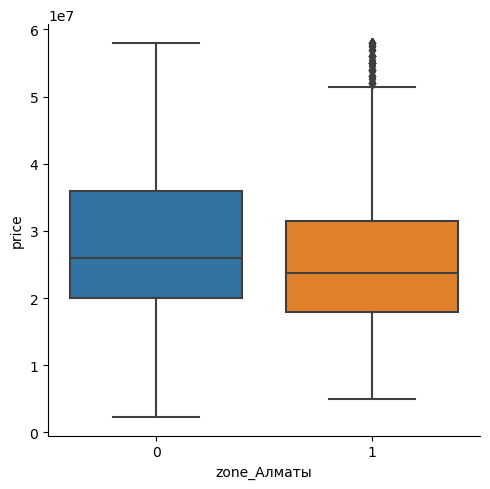

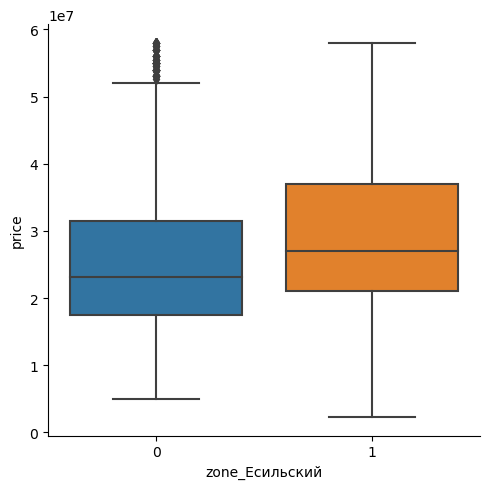

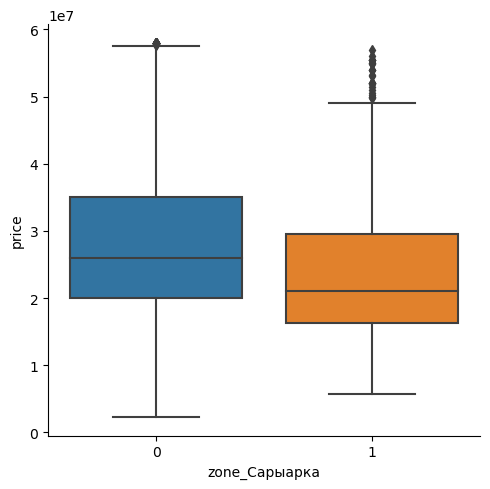

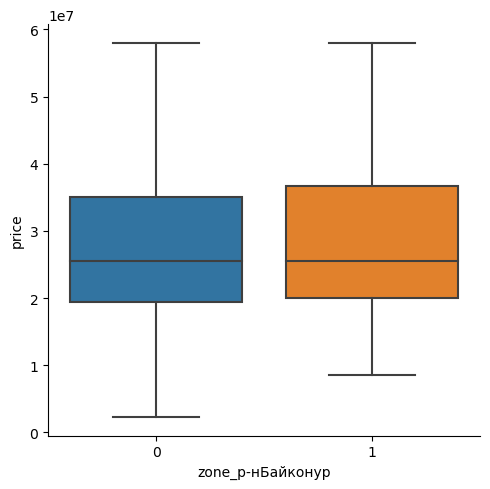

In [41]:
sns.catplot(x='zone_Алматы', y='price', data=housing, kind='box')
sns.catplot(x='zone_Есильский', y='price', data=housing, kind='box')
sns.catplot(x='zone_Сарыарка', y='price', data=housing, kind='box')
sns.catplot(x='zone_р-нБайконур', y='price', data=housing, kind='box')
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [35]:
len(housing.columns)

17

In [98]:
X = housing.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16]]
y = housing.iloc[:, 9]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [108]:
lr = LinearRegression()
rf = RandomForestRegressor(max_depth=8, max_features=0.75, min_samples_leaf=1, min_samples_split=10, n_estimators=200)
xgbr = XGBRegressor(learning_rate=0.1, gamma=0, max_depth=3, n_estimators=200, subsample=0.7, colsample_bytree=1, reg_lambda=0.5, \
                   reg_alpha=0)

In [ ]:
{'max_depth': 8, 'max_features': 0.75, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}

In [109]:
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [97]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Create the XGBRegressor object
xgbr = xgb.XGBRegressor(objective='reg:squarederror')

# Set the hyperparameters
params = {
    'max_depth': [1, 2, 3],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(xgbr, param_grid=params, cv=10, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="rmse", eval_set=[(X_test, y_test)], verbose=False)

# Print the best hyperparameters and score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Train the best model on the full training set
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="rmse", eval_set=[(X_test, y_test)], verbose=False)

# Make predictions on the test set and calculate performance metrics
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("RMSE: ", mse ** 0.5)

r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)


C:\Users\rusya\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\rusya\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Best hyperparameters:  {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 0.5, 'subsample': 0.7}
Best score:  0.7926058391931796
RMSE:  5161348.567169311
R2 score:  0.7815864088554781


In [95]:

# Define the hyperparameter grid
params_rf = {
    'max_depth': [2, 3, 4],
    'n_estimators': [100, 200, 300],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Instantiate a random forest regressor
rf = RandomForestRegressor()

# Perform Grid Search CV with 5-fold cross-validation and maximum parallelization
grid_search_rf = GridSearchCV(rf, param_grid=params_rf, cv=10, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_rf.fit(X, y)

# Print the best hyperparameters and score
print("Best hyperparameters: ", grid_search_rf.best_params_)
print("Best score: ", grid_search_rf.best_score_)


# Train a random forest regressor using the best hyperparameters found by Grid Search CV
best_model = grid_search_rf.best_estimator_
best_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate the RMSE and R^2 score
mse = mean_squared_error(y_test, y_pred)
print("RMSE: ", mse ** 0.5)

r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)


C:\Users\rusya\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best hyperparameters:  {'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 100}
Best score:  0.7104707122011653


C:\Users\rusya\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RMSE:  6009610.283405253
R2 score:  0.7038948923195818


In [107]:
# Define the hyperparameter grid
params_rf = {
    'max_depth': [4, 6, 8],
    'n_estimators': [100, 200, 500],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', 0.25, 0.5, 0.75]
}

# Instantiate a random forest regressor
rf = RandomForestRegressor()

# Perform Grid Search CV with 5-fold cross-validation and maximum parallelization
grid_search_rf = GridSearchCV(rf, param_grid=params_rf, cv=10, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_rf.fit(X, y)

# Print the best hyperparameters and score
print("Best hyperparameters: ", grid_search_rf.best_params_)
print("Best score: ", grid_search_rf.best_score_)

# Train a random forest regressor using the best hyperparameters found by Grid Search CV
best_model = grid_search_rf.best_estimator_
best_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate the RMSE and R^2 score
mse = mean_squared_error(y_test, y_pred)
print("RMSE: ", mse ** 0.5)

r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)


Best hyperparameters:  {'max_depth': 8, 'max_features': 0.75, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best score:  0.7873798553735988
RMSE:  5235266.92717472
R2 score:  0.7879009727839611


In [110]:
y_pred = rf.predict(X_test)
y_pred2 = lr.predict(X_test)
score = xgbr.score(X_train, y_train)
y_pred3 = xgbr.predict(X_test)

In [104]:
cv_score = cross_val_score(xgbr, X_train, y_train, cv=10)
print(cv_score)

[0.78394025 0.83438702 0.8131971  0.79256206 0.78449867 0.81079494
 0.79879554 0.73689304 0.77191876 0.80128917]


In [105]:
print(score)

0.8237164754981416


In [111]:
r2_one_rf = r2_score(y_test, y_pred)
mse_one_rf = mean_squared_error(y_test, y_pred)
r2_one_lr = r2_score(y_test, y_pred2)
mse_one_lr = mean_squared_error(y_test, y_pred2)
r2_one_xg = r2_score(y_test, y_pred3)
mse_one_xg = mean_squared_error(y_test, y_pred3)

print(r2_one_rf)
print(mse_one_rf ** 0.5)
print()
print(r2_one_lr)
print(mse_one_lr ** 0.5)
print()
print(r2_one_xg)
print(mse_one_xg ** 0.5)

0.7872399870115494
5243418.178889305

0.6699329315443863
6530863.237548005

0.7968466982376937
5123673.34489717


In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the MLP model
model = Sequential()

# Add the input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add additional hidden layers
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))




# Add the output layer
model.add(Dense(units=1))

optimizer = Adam(learning_rate=0.01)

# Compile the model
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=128)

# Evaluate the model on the testing data
mse = model.evaluate(X_test, y_test)
print("RMSE: ", mse ** 0.5)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)


Epoch 1/100
45/45 [==============================] - 1s 2ms/step - loss: 894368688898048.0000
Epoch 2/100
45/45 [==============================] - 0s 2ms/step - loss: 455464806514688.0000
Epoch 3/100
45/45 [==============================] - 0s 2ms/step - loss: 61632281575424.0000
Epoch 4/100
45/45 [==============================] - 0s 2ms/step - loss: 44870081183744.0000
Epoch 5/100
45/45 [==============================] - 0s 2ms/step - loss: 41449156509696.0000
Epoch 6/100
45/45 [==============================] - 0s 2ms/step - loss: 40128621838336.0000
Epoch 7/100
45/45 [==============================] - 0s 2ms/step - loss: 39156755464192.0000
Epoch 8/100
45/45 [==============================] - 0s 2ms/step - loss: 38652700786688.0000
Epoch 9/100
45/45 [==============================] - 0s 2ms/step - loss: 38235262681088.0000
Epoch 10/100
45/45 [==============================] - 0s 2ms/step - loss: 37669975359488.0000
Epoch 11/100
45/45 [==============================] - 0s 2ms/step -

In [101]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from keras.wrappers.scikit_learn import KerasRegressor


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
def create_model(num_hidden_layers, num_units, learning_rate):
    model = Sequential()
    model.add(Dense(units=num_units, activation='relu', input_dim=X_train.shape[1]))
    for i in range(num_hidden_layers):
        model.add(Dense(units=num_units, activation='relu'))
    model.add(Dense(units=1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Define the hyperparameter grid
param_grid = {
    'num_hidden_layers': [1, 2, 3],
    'num_units': [64, 128, 256],
    'learning_rate': [0.0001, 0.001, 0.01]
}

# Create a scorer for the R2 score
r2_scorer = make_scorer(r2_score)

# Create a grid search object
grid_search = GridSearchCV(estimator=KerasRegressor(build_fn=create_model, epochs=100, batch_size=128, verbose=0),
                           param_grid=param_grid, scoring=r2_scorer, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

# Evaluate the model on the testing data with the best parameters
best_model = grid_search.best_estimator_.model
mse = best_model.evaluate(X_test, y_test)
print("RMSE: ", mse ** 0.5)

y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)

C:\Users\rusya\AppData\Local\Temp\ipykernel_7692\1511737692.py:42: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_search = GridSearchCV(estimator=KerasRegressor(build_fn=create_model, epochs=100, batch_size=128, verbose=0),


Best parameters:  {'learning_rate': 0.01, 'num_hidden_layers': 3, 'num_units': 64}
Best R2 score:  0.7577145897441186
45/45 [==============================] - 0s 1ms/step - loss: 30157104480256.0000
RMSE:  5491548.459246809
45/45 [==============================] - 0s 1ms/step
R2 score:  0.752746196095025


In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from keras.wrappers.scikit_learn import KerasRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
def create_model(num_hidden_layers, num_units, learning_rate):
    model = Sequential()
    model.add(Dense(units=num_units, activation='relu', input_dim=X_train.shape[1]))
    for i in range(num_hidden_layers):
        model.add(Dense(units=num_units, activation='relu'))
    model.add(Dense(units=1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Define the hyperparameter grid
param_grid = {
    'num_hidden_layers': [4, 5, 6],
    'num_units': [128, 256, 512],
    'learning_rate': [0.0001, 0.001, 0.01]
}

# Create a scorer for the R2 score
r2_scorer = make_scorer(r2_score)

# Create a grid search object
grid_search = GridSearchCV(estimator=KerasRegressor(build_fn=create_model, epochs=100, batch_size=128, verbose=0),
                           param_grid=param_grid, scoring=r2_scorer, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

# Evaluate the model on the testing data with the best parameters
best_model = grid_search.best_estimator_.model
mse = best_model.evaluate(X_test, y_test)
print("RMSE: ", mse ** 0.5)

y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)

C:\Users\rusya\AppData\Local\Temp\ipykernel_20956\3999545828.py:41: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_search = GridSearchCV(estimator=KerasRegressor(build_fn=create_model, epochs=100, batch_size=128, verbose=0),


Best parameters:  {'learning_rate': 0.001, 'num_hidden_layers': 5, 'num_units': 256}
Best R2 score:  0.7587344918746585
45/45 [==============================] - 0s 1ms/step - loss: 29171801653248.0000
RMSE:  5401092.635129303
45/45 [==============================] - 0s 2ms/step
R2 score:  0.7608246492410629


In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from keras.wrappers.scikit_learn import KerasRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
def create_model(num_hidden_layers, num_units, learning_rate):
    model = Sequential()
    model.add(Dense(units=num_units, activation='relu', input_dim=X_train.shape[1]))
    for i in range(num_hidden_layers):
        model.add(Dense(units=num_units, activation='relu'))
    model.add(Dense(units=1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Define the hyperparameter grid
param_grid = {
    'num_hidden_layers': [7, 8, 9],
    'num_units': [128, 256, 512],
    'learning_rate': [0.0001, 0.001, 0.01]
}

# Create a scorer for the R2 score
r2_scorer = make_scorer(r2_score)

# Create a grid search object
grid_search = GridSearchCV(estimator=KerasRegressor(build_fn=create_model, epochs=100, batch_size=128, verbose=0),
                           param_grid=param_grid, scoring=r2_scorer, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

# Evaluate the model on the testing data with the best parameters
best_model = grid_search.best_estimator_.model
mse = best_model.evaluate(X_test, y_test)
print("RMSE: ", mse ** 0.5)

y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)

C:\Users\rusya\AppData\Local\Temp\ipykernel_20956\867209848.py:41: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_search = GridSearchCV(estimator=KerasRegressor(build_fn=create_model, epochs=100, batch_size=128, verbose=0),


Best parameters:  {'learning_rate': 0.001, 'num_hidden_layers': 8, 'num_units': 128}
Best R2 score:  0.7618626770259918
45/45 [==============================] - 0s 2ms/step - loss: 29078446931968.0000
RMSE:  5392443.502899961
45/45 [==============================] - 0s 2ms/step
R2 score:  0.7615899729140599


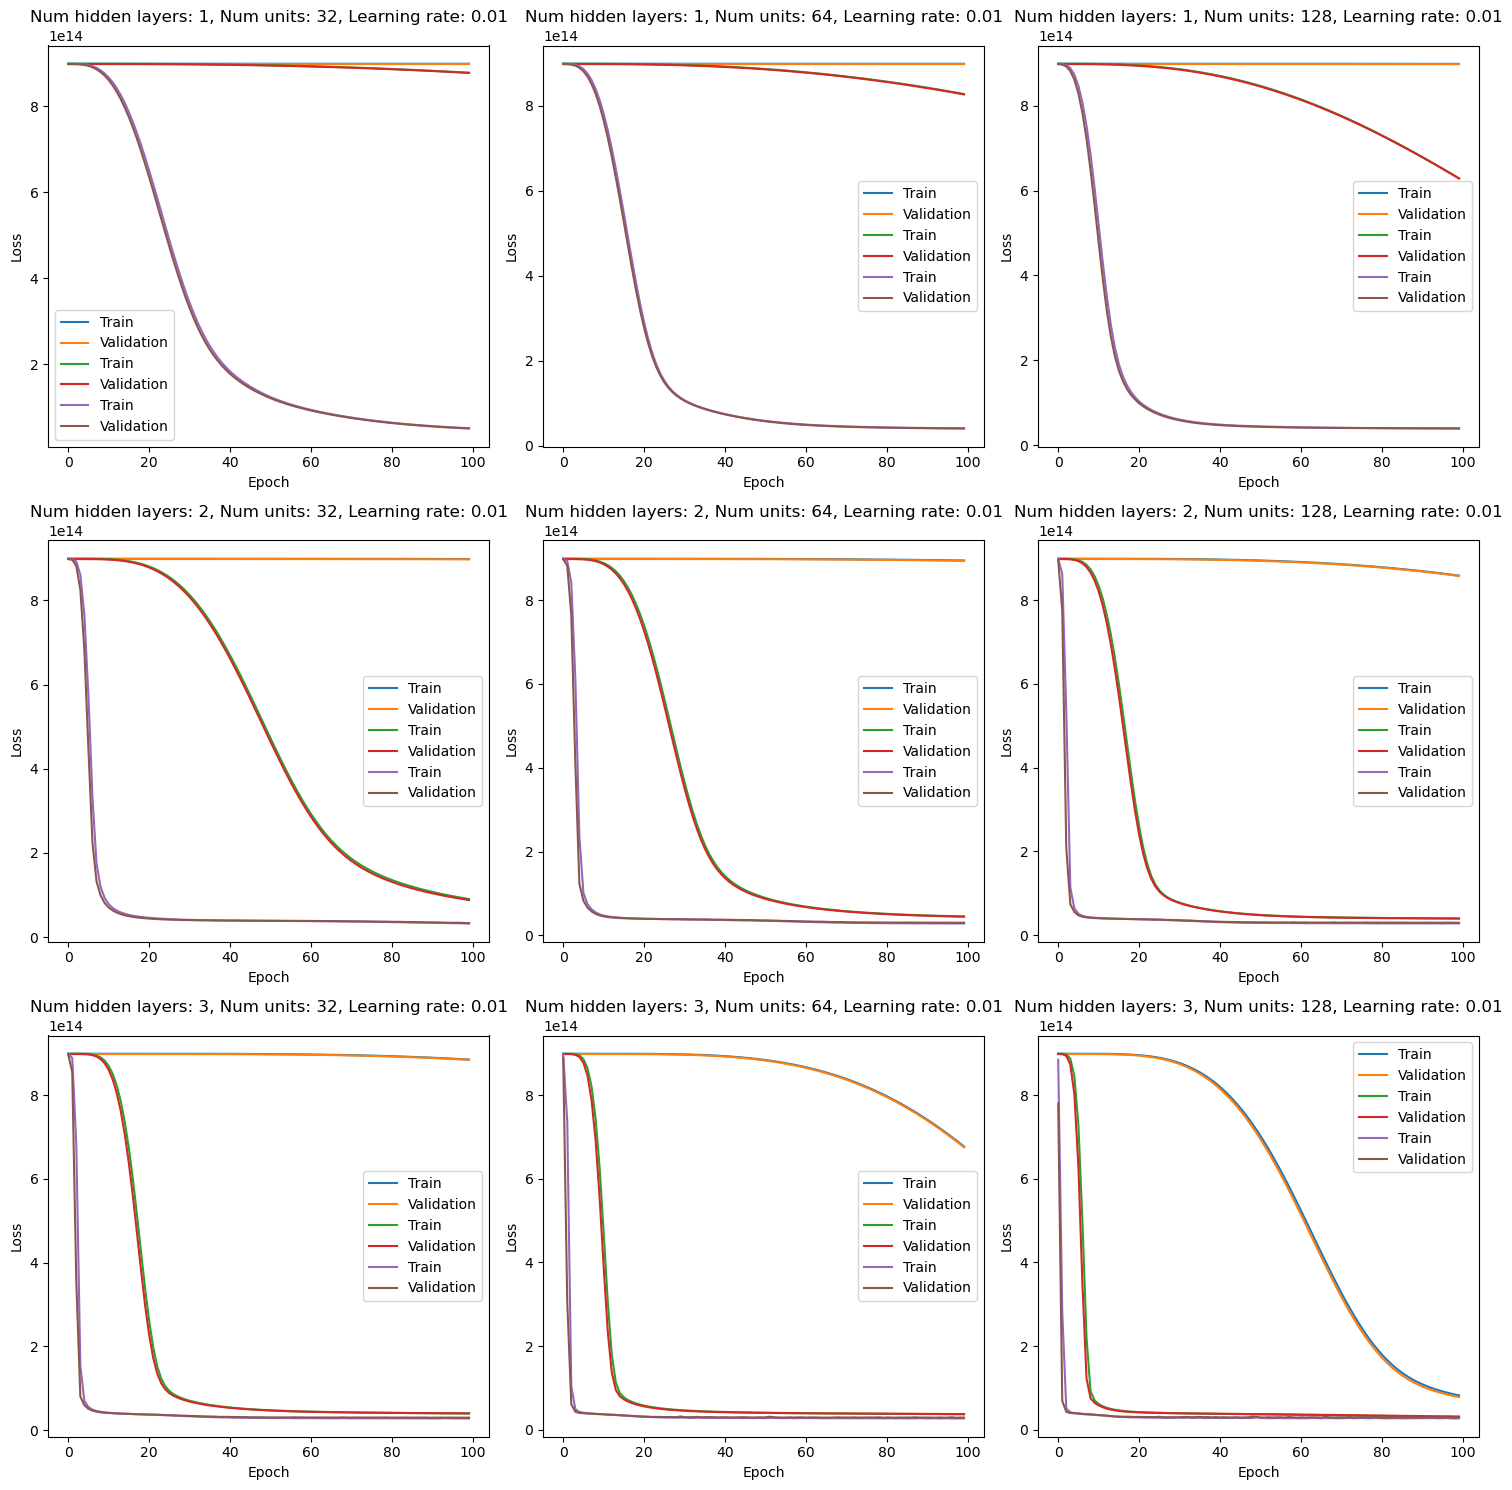

In [56]:
fig, axes = plt.subplots(len(param_grid['num_hidden_layers']), len(param_grid['num_units']), figsize=(15, 15))
for i, num_hidden_layers in enumerate(param_grid['num_hidden_layers']):
    for j, num_units in enumerate(param_grid['num_units']):
        for k, learning_rate in enumerate(param_grid['learning_rate']):
            ax = axes[i][j]
            ax.plot(train_losses[i, j, k], label='Train')
            ax.plot(val_losses[i, j, k], label='Validation')
            ax.set_xlabel('Epoch')
            ax.set_ylabel('Loss')
            ax.set_title(f'Num hidden layers: {num_hidden_layers}, Num units: {num_units}, Learning rate: {learning_rate}')
            ax.legend()
plt.tight_layout()
plt.show()

Best parameters: 
num_hidden_layers:  4
num_units:  64
learning_rate:  0.01
Best validation loss: (2, 1, 2, 91)


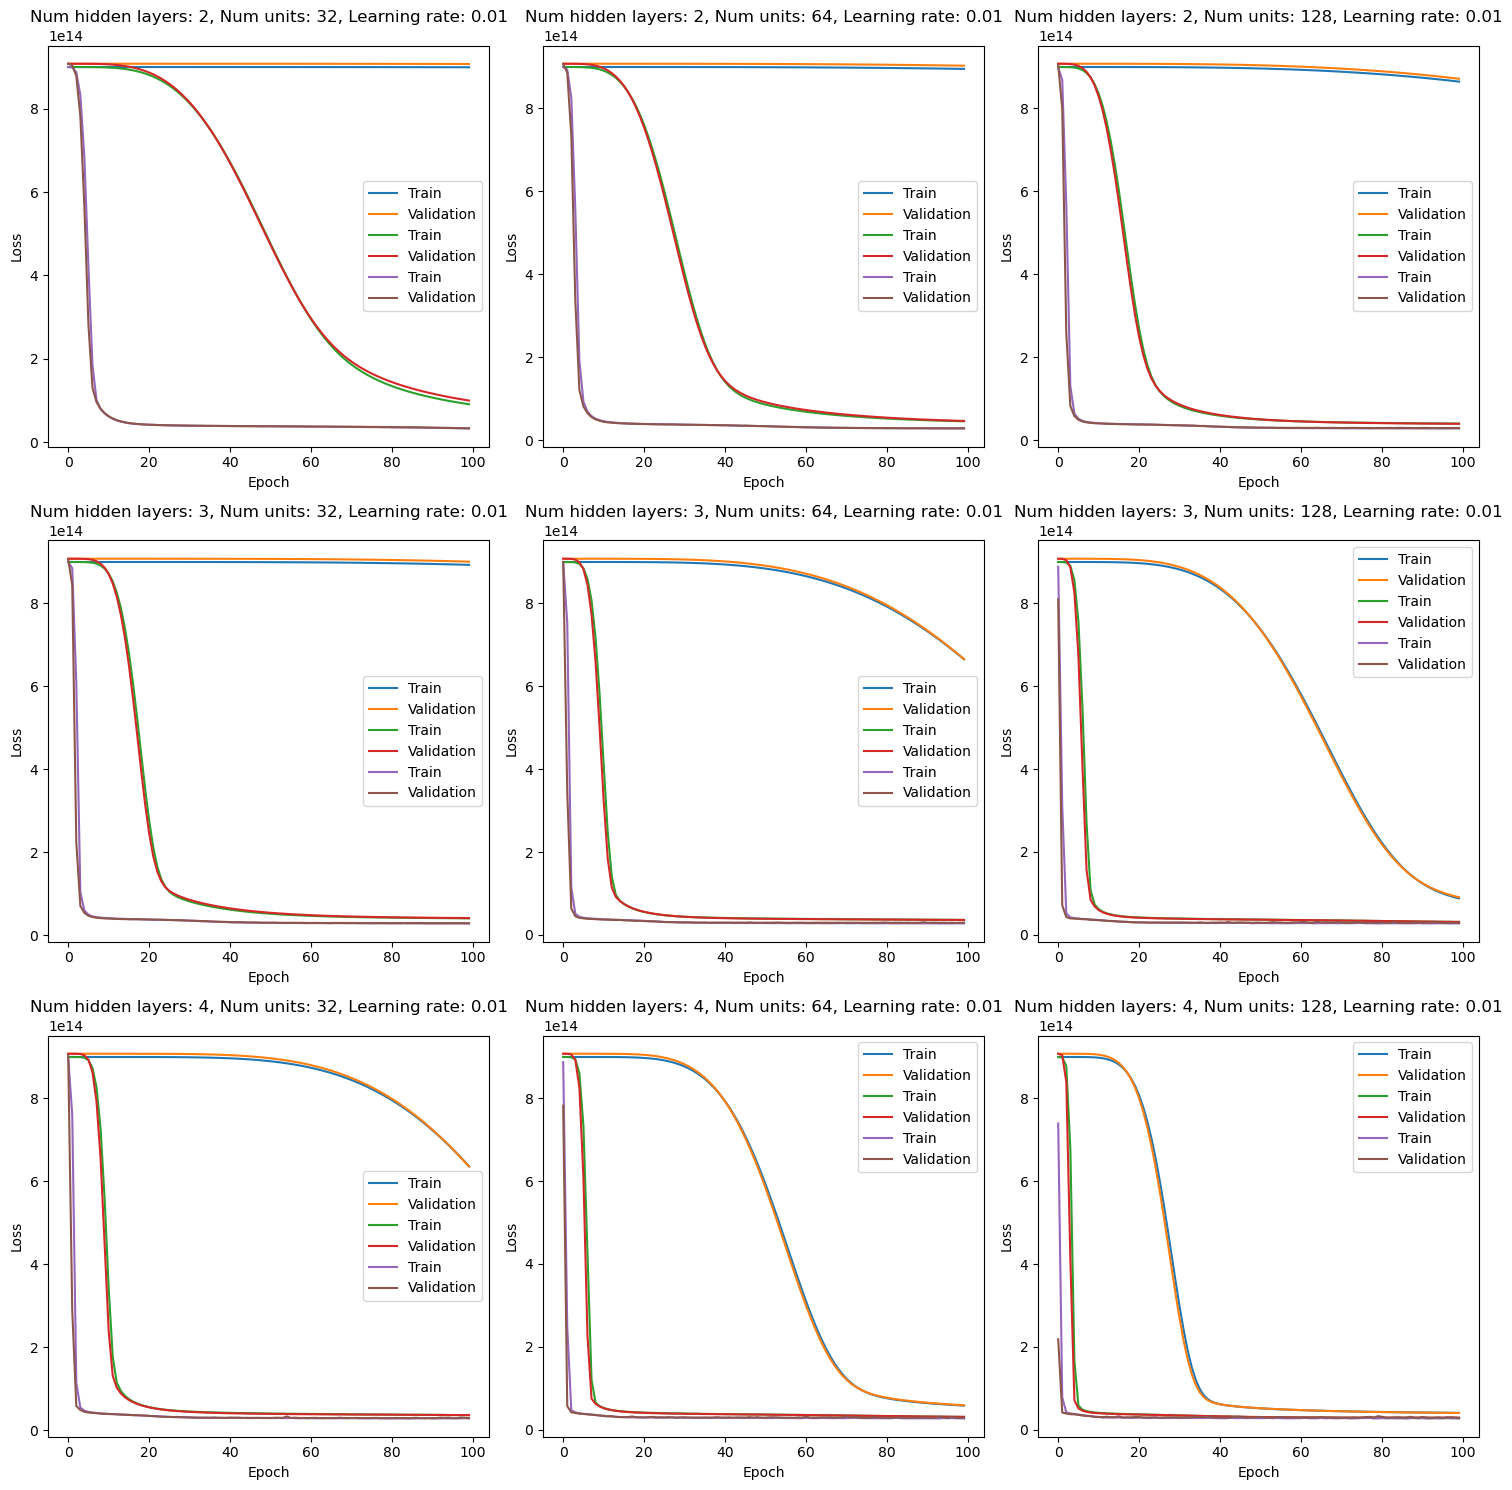

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Scale the input features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define the model
def create_model(num_hidden_layers, num_units, learning_rate):
    model = Sequential()
    model.add(Dense(units=num_units, activation='relu', input_dim=X_train.shape[1]))
    for i in range(num_hidden_layers):
        model.add(Dense(units=num_units, activation='relu'))
    model.add(Dense(units=1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Define the hyperparameter grid
param_grid = {
    'num_hidden_layers': [2, 3, 4],
    'num_units': [32, 64, 128],
    'learning_rate': [0.0001, 0.001, 0.01]
}

# Define the number of epochs and batch size
epochs = 100
batch_size = 128

# Define arrays to store training and validation losses
train_losses = np.zeros((len(param_grid['num_hidden_layers']), len(param_grid['num_units']), len(param_grid['learning_rate']), epochs))
val_losses = np.zeros((len(param_grid['num_hidden_layers']), len(param_grid['num_units']), len(param_grid['learning_rate']), epochs))

# Train models with different hyperparameters
for i, num_hidden_layers in enumerate(param_grid['num_hidden_layers']):
    for j, num_units in enumerate(param_grid['num_units']):
        for k, learning_rate in enumerate(param_grid['learning_rate']):
            model = create_model(num_hidden_layers=num_hidden_layers, num_units=num_units, learning_rate=learning_rate)
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, validation_data=(X_val, y_val))
            train_losses[i, j, k, :] = history.history['loss']
            val_losses[i, j, k, :] = history.history['val_loss']

# Find the best hyperparameters
min_val_loss_idx = np.unravel_index(np.argmin(val_losses), val_losses.shape)
best_num_hidden_layers = param_grid['num_hidden_layers'][min_val_loss_idx[0]]
best_num_units = param_grid['num_units'][min_val_loss_idx[1]]
best_learning_rate = param_grid['learning_rate'][min_val_loss_idx[2]]

# Print the best parameters and score
print("Best parameters: ")
print("num_hidden_layers: ", best_num_hidden_layers)
print("num_units: ", best_num_units)
print("learning_rate: ", best_learning_rate)
print("Best validation loss:", min_val_loss_idx)

fig, axes = plt.subplots(len(param_grid['num_hidden_layers']), len(param_grid['num_units']), figsize=(15, 15))
for i, num_hidden_layers in enumerate(param_grid['num_hidden_layers']):
    for j, num_units in enumerate(param_grid['num_units']):
        for k, learning_rate in enumerate(param_grid['learning_rate']):
            ax = axes[i][j]
            ax.plot(train_losses[i, j, k], label='Train')
            ax.plot(val_losses[i, j, k], label='Validation')
            ax.set_xlabel('Epoch')
            ax.set_ylabel('Loss')
            ax.set_title(f'Num hidden layers: {num_hidden_layers}, Num units: {num_units}, Learning rate: {learning_rate}')
            ax.legend()
plt.tight_layout()
plt.show()

Best parameters: 
num_hidden_layers:  4
num_units:  128
learning_rate:  0.01
Best validation loss: (2, 1, 2, 32)
45/45 [==============================] - 0s 1ms/step
R-squared score on the test set: 0.7489069521415671
RMSE score on the test set: 5534019.742592927


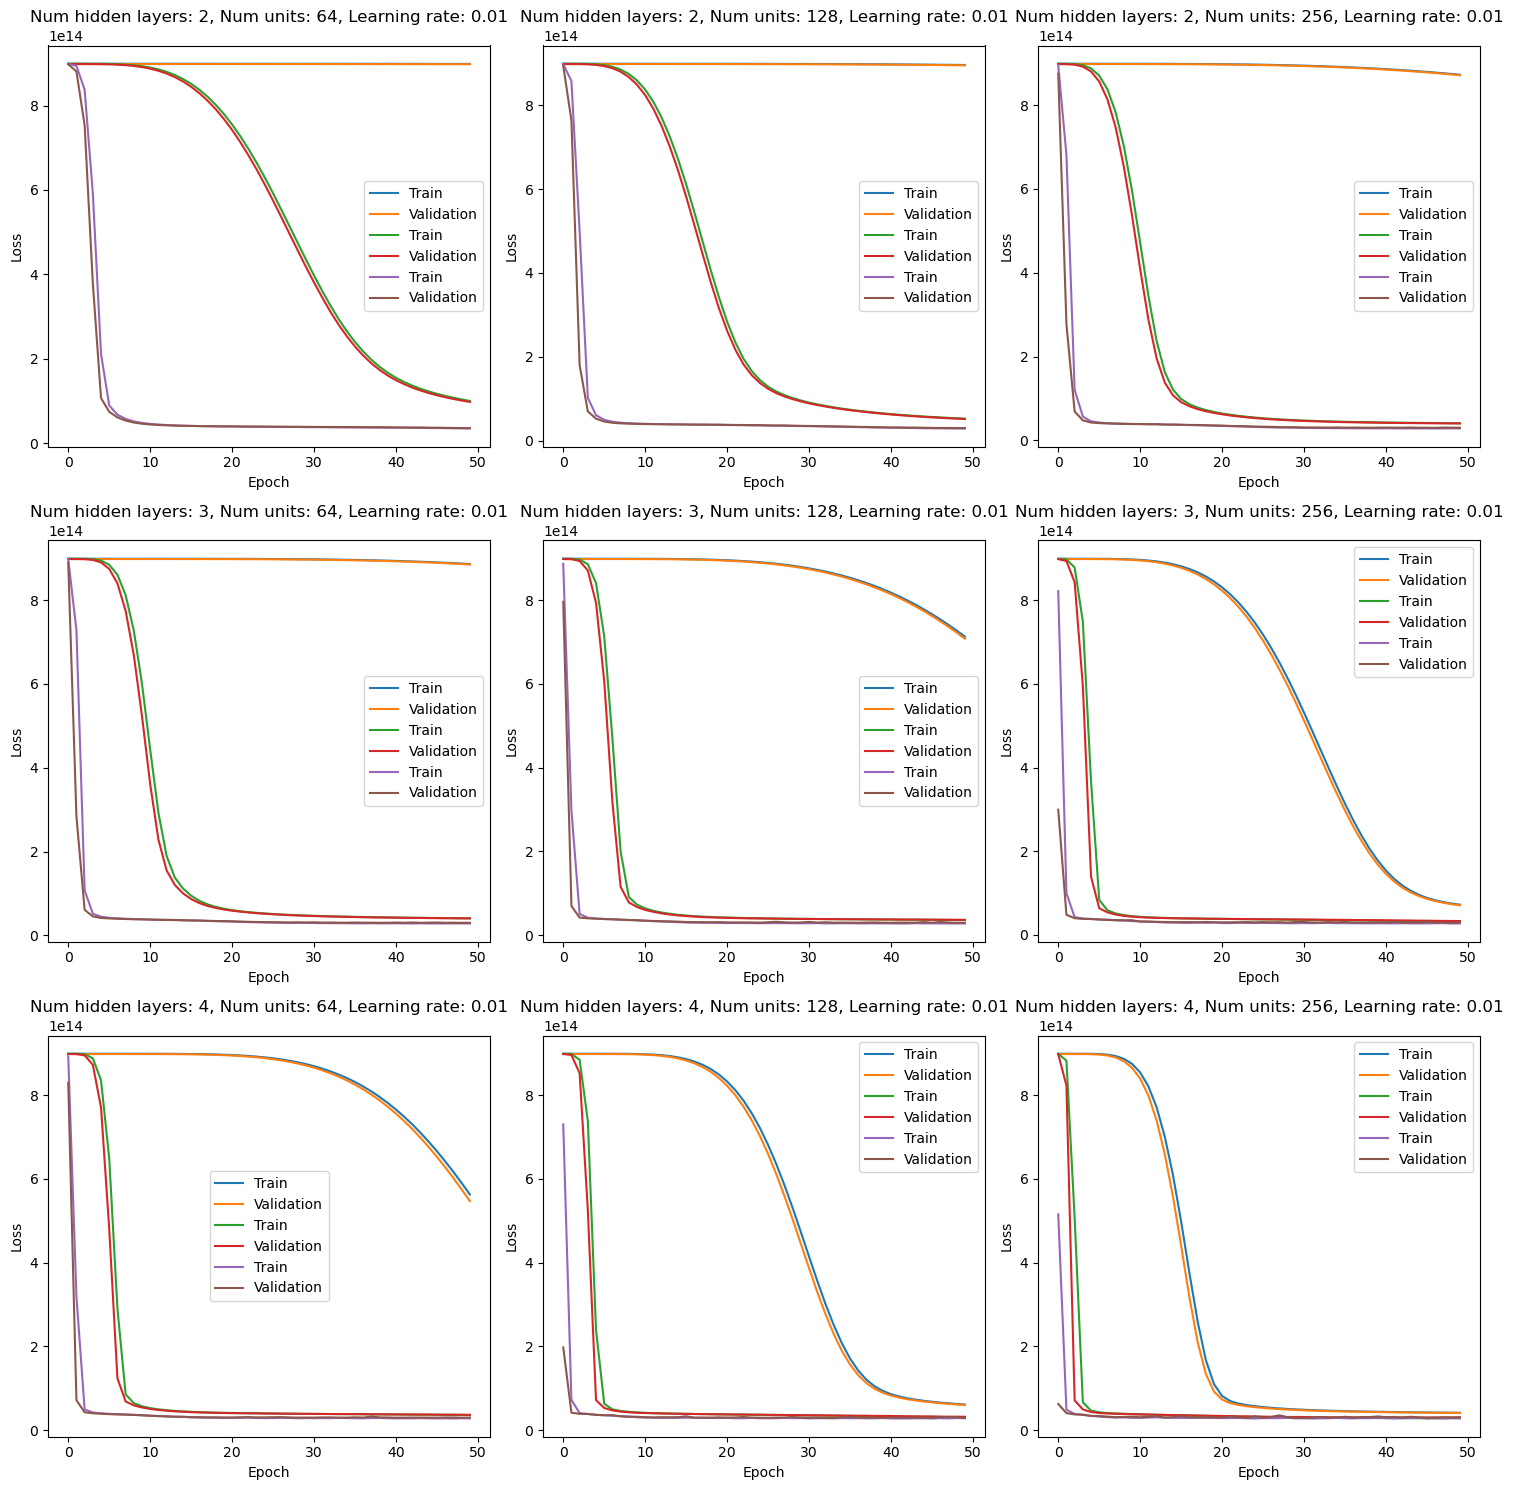

In [90]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Scale the input features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define the model
def create_model(num_hidden_layers, num_units, learning_rate):
    model = Sequential()
    model.add(Dense(units=num_units, activation='relu', input_dim=X_train.shape[1]))
    for i in range(num_hidden_layers):
        model.add(Dense(units=num_units, activation='relu'))
    model.add(Dense(units=1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Define the hyperparameter grid
param_grid = {
    'num_hidden_layers': [2, 3, 4],
    'num_units': [64, 128, 256],
    'learning_rate': [0.0001, 0.001, 0.01]
}

# Define the number of epochs and batch size
epochs = 50
batch_size = 128

# Define arrays to store training and validation losses
train_losses = np.zeros((len(param_grid['num_hidden_layers']), len(param_grid['num_units']), len(param_grid['learning_rate']), epochs))
val_losses = np.zeros((len(param_grid['num_hidden_layers']), len(param_grid['num_units']), len(param_grid['learning_rate']), epochs))

# Train models with different hyperparameters
for i, num_hidden_layers in enumerate(param_grid['num_hidden_layers']):
    for j, num_units in enumerate(param_grid['num_units']):
        for k, learning_rate in enumerate(param_grid['learning_rate']):
            model = create_model(num_hidden_layers=num_hidden_layers, num_units=num_units, learning_rate=learning_rate)
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, validation_data=(X_val, y_val))
            train_losses[i, j, k, :] = history.history['loss']
            val_losses[i, j, k, :] = history.history['val_loss']

# Find the best hyperparameters
min_val_loss_idx = np.unravel_index(np.argmin(val_losses), val_losses.shape)
best_num_hidden_layers = param_grid['num_hidden_layers'][min_val_loss_idx[0]]
best_num_units = param_grid['num_units'][min_val_loss_idx[1]]
best_learning_rate = param_grid['learning_rate'][min_val_loss_idx[2]]

# Print the best parameters and score
print("Best parameters: ")
print("num_hidden_layers: ", best_num_hidden_layers)
print("num_units: ", best_num_units)
print("learning_rate: ", best_learning_rate)
print("Best validation loss:", min_val_loss_idx)

# Train a new model with the best hyperparameters on the combined training and validation sets
model = create_model(num_hidden_layers=best_num_hidden_layers, num_units=best_num_units, learning_rate=best_learning_rate)
history = model.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]), epochs=epochs, batch_size=batch_size, verbose=0)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the r2 and RMSE scores
print("R-squared score on the test set:", r2)
print("RMSE score on the test set:", rmse)

fig, axes = plt.subplots(len(param_grid['num_hidden_layers']), len(param_grid['num_units']), figsize=(15, 15))
for i, num_hidden_layers in enumerate(param_grid['num_hidden_layers']):
    for j, num_units in enumerate(param_grid['num_units']):
        for k, learning_rate in enumerate(param_grid['learning_rate']):
            ax = axes[i][j]
            ax.plot(train_losses[i, j, k], label='Train')
            ax.plot(val_losses[i, j, k], label='Validation')
            ax.set_xlabel('Epoch')
            ax.set_ylabel('Loss')
            ax.set_title(f'Num hidden layers: {num_hidden_layers}, Num units: {num_units}, Learning rate: {learning_rate}')
            ax.legend()
plt.tight_layout()
plt.show()

Best parameters: 
num_hidden_layers:  10
num_units:  256
learning_rate:  0.01
Best validation loss: (2, 2, 2, 47)
45/45 [==============================] - 0s 2ms/step
R-squared score on the test set: 0.7150837612720846
RMSE score on the test set: 5842693.605873468


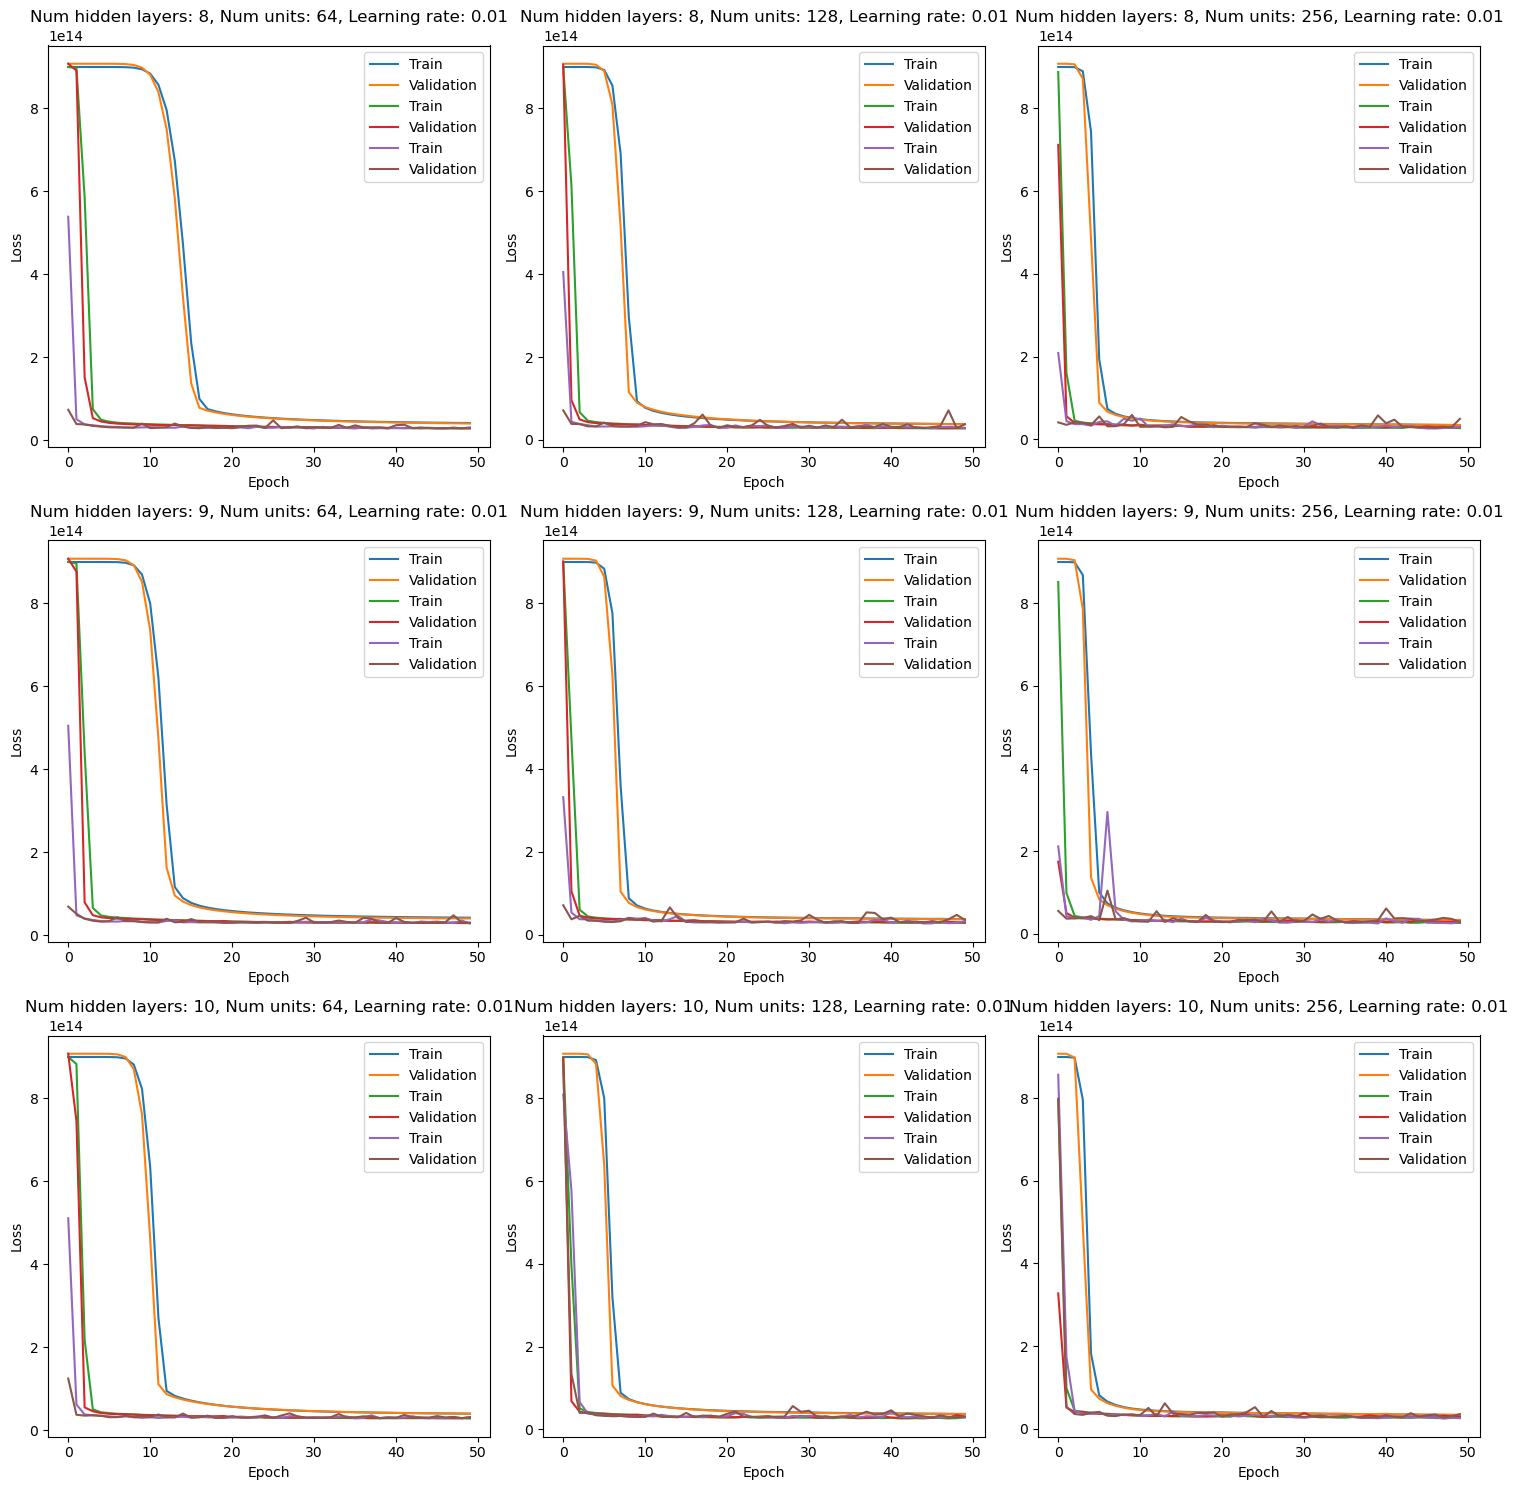

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Scale the input features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define the model
def create_model(num_hidden_layers, num_units, learning_rate):
    model = Sequential()
    model.add(Dense(units=num_units, activation='relu', input_dim=X_train.shape[1]))
    for i in range(num_hidden_layers):
        model.add(Dense(units=num_units, activation='relu'))
    model.add(Dense(units=1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Define the hyperparameter grid
param_grid = {
    'num_hidden_layers': [8, 9, 10],
    'num_units': [64, 128, 256],
    'learning_rate': [0.0001, 0.001, 0.01]
}

# Define the number of epochs and batch size
epochs = 50
batch_size = 128

# Define arrays to store training and validation losses
train_losses = np.zeros((len(param_grid['num_hidden_layers']), len(param_grid['num_units']), len(param_grid['learning_rate']), epochs))
val_losses = np.zeros((len(param_grid['num_hidden_layers']), len(param_grid['num_units']), len(param_grid['learning_rate']), epochs))

# Train models with different hyperparameters
for i, num_hidden_layers in enumerate(param_grid['num_hidden_layers']):
    for j, num_units in enumerate(param_grid['num_units']):
        for k, learning_rate in enumerate(param_grid['learning_rate']):
            model = create_model(num_hidden_layers=num_hidden_layers, num_units=num_units, learning_rate=learning_rate)
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, validation_data=(X_val, y_val))
            train_losses[i, j, k, :] = history.history['loss']
            val_losses[i, j, k, :] = history.history['val_loss']

# Find the best hyperparameters
min_val_loss_idx = np.unravel_index(np.argmin(val_losses), val_losses.shape)
best_num_hidden_layers = param_grid['num_hidden_layers'][min_val_loss_idx[0]]
best_num_units = param_grid['num_units'][min_val_loss_idx[1]]
best_learning_rate = param_grid['learning_rate'][min_val_loss_idx[2]]

# Print the best parameters and score
print("Best parameters: ")
print("num_hidden_layers: ", best_num_hidden_layers)
print("num_units: ", best_num_units)
print("learning_rate: ", best_learning_rate)
print("Best validation loss:", min_val_loss_idx)

# Train a new model with the best hyperparameters on the combined training and validation sets
model = create_model(num_hidden_layers=best_num_hidden_layers, num_units=best_num_units, learning_rate=best_learning_rate)
history = model.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]), epochs=epochs, batch_size=batch_size, verbose=0)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the r2 and RMSE scores
print("R-squared score on the test set:", r2)
print("RMSE score on the test set:", rmse)


fig, axes = plt.subplots(len(param_grid['num_hidden_layers']), len(param_grid['num_units']), figsize=(15, 15))
for i, num_hidden_layers in enumerate(param_grid['num_hidden_layers']):
    for j, num_units in enumerate(param_grid['num_units']):
        for k, learning_rate in enumerate(param_grid['learning_rate']):
            ax = axes[i][j]
            ax.plot(train_losses[i, j, k], label='Train')
            ax.plot(val_losses[i, j, k], label='Validation')
            ax.set_xlabel('Epoch')
            ax.set_ylabel('Loss')
            ax.set_title(f'Num hidden layers: {num_hidden_layers}, Num units: {num_units}, Learning rate: {learning_rate}')
            ax.legend()
plt.tight_layout()
plt.show()

Best parameters: 
num_hidden_layers:  10
num_units:  256
learning_rate:  0.01
Best validation loss: (0, 2, 2, 42)
45/45 [==============================] - 0s 2ms/step
R-squared score on the test set: 0.735581693146083
RMSE score on the test set: 5678964.056939346


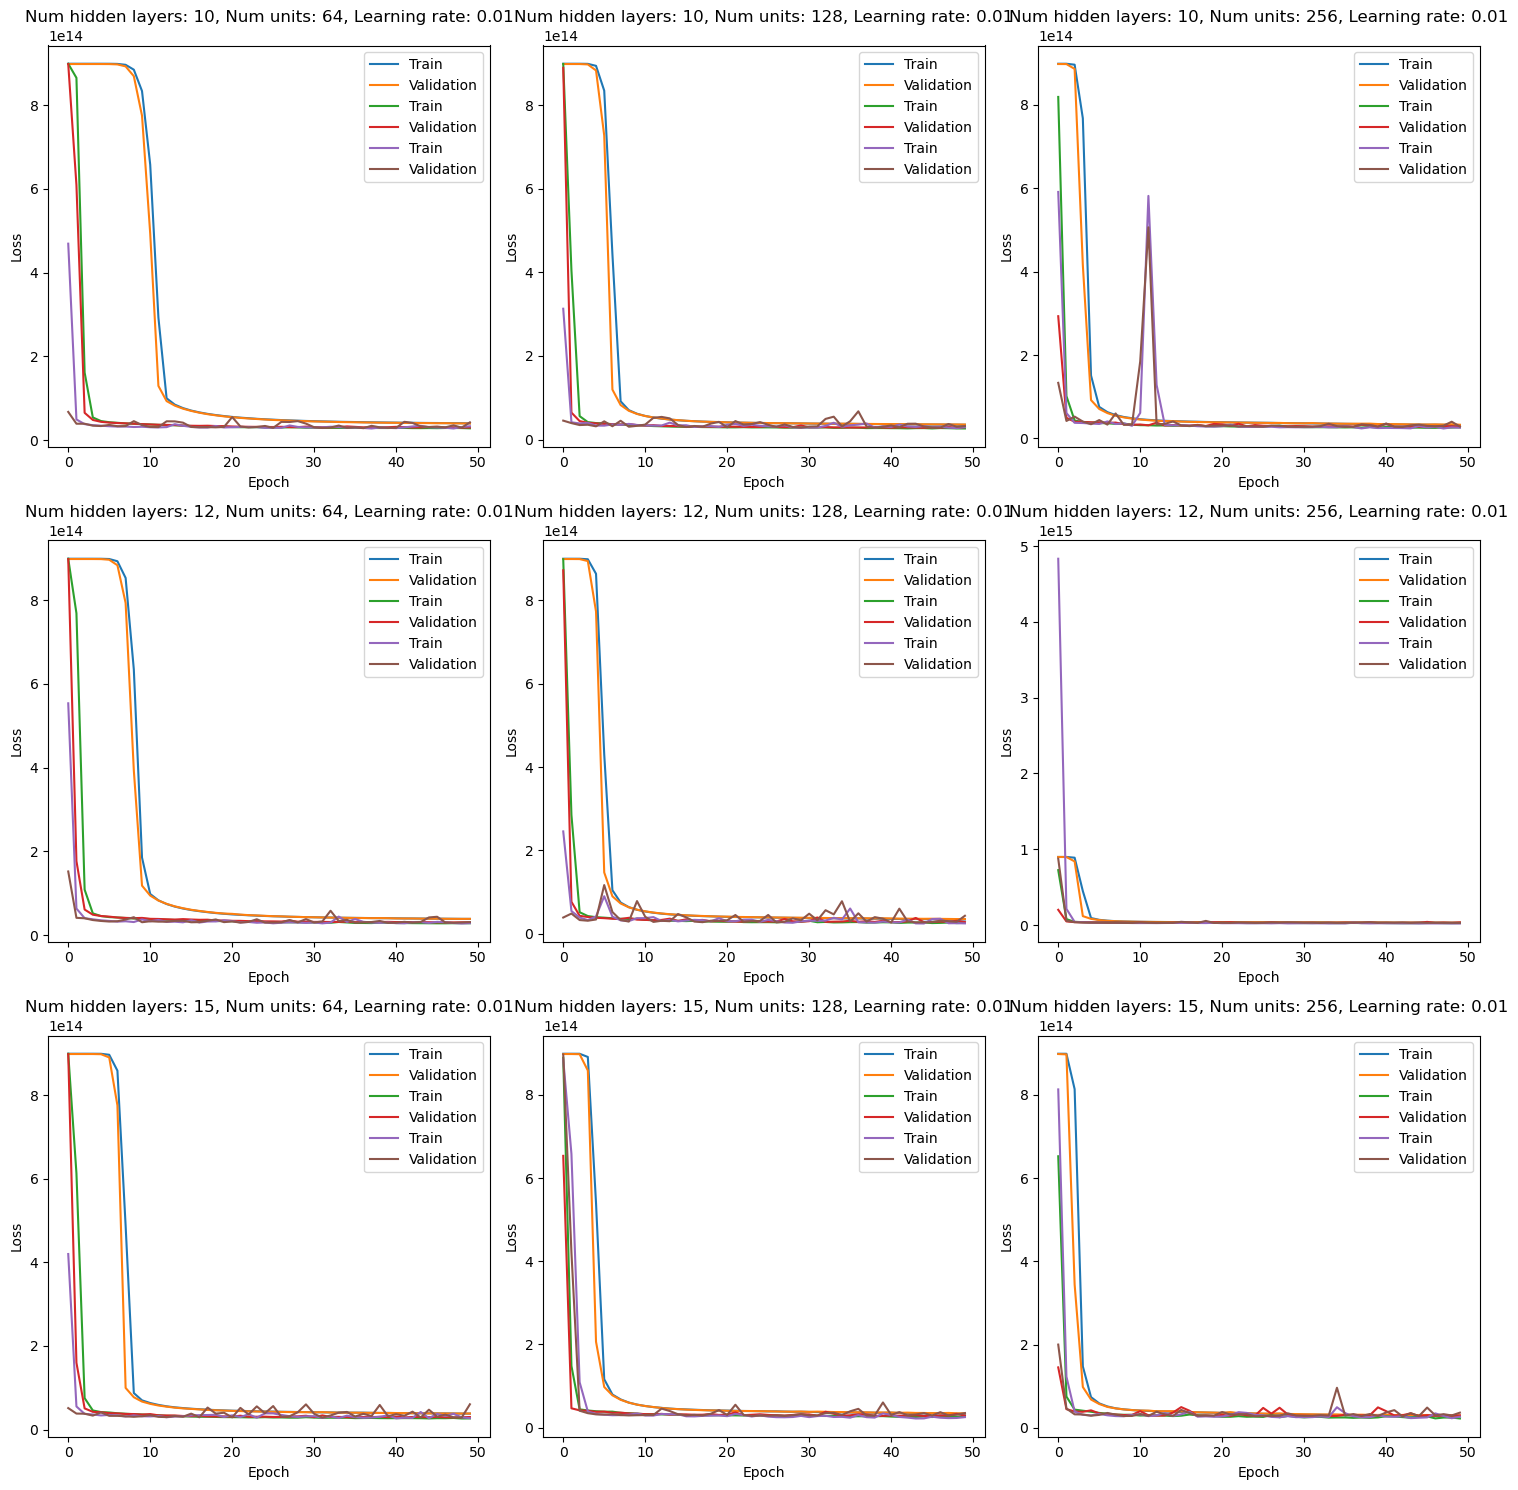

In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Scale the input features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define the model
def create_model(num_hidden_layers, num_units, learning_rate):
    model = Sequential()
    model.add(Dense(units=num_units, activation='relu', input_dim=X_train.shape[1]))
    for i in range(num_hidden_layers):
        model.add(Dense(units=num_units, activation='relu'))
    model.add(Dense(units=1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Define the hyperparameter grid
param_grid = {
    'num_hidden_layers': [10, 12, 15],
    'num_units': [64, 128, 256],
    'learning_rate': [0.0001, 0.001, 0.01]
}

# Define the number of epochs and batch size
epochs = 50
batch_size = 128

# Define arrays to store training and validation losses
train_losses = np.zeros((len(param_grid['num_hidden_layers']), len(param_grid['num_units']), len(param_grid['learning_rate']), epochs))
val_losses = np.zeros((len(param_grid['num_hidden_layers']), len(param_grid['num_units']), len(param_grid['learning_rate']), epochs))

# Train models with different hyperparameters
for i, num_hidden_layers in enumerate(param_grid['num_hidden_layers']):
    for j, num_units in enumerate(param_grid['num_units']):
        for k, learning_rate in enumerate(param_grid['learning_rate']):
            model = create_model(num_hidden_layers=num_hidden_layers, num_units=num_units, learning_rate=learning_rate)
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, validation_data=(X_val, y_val))
            train_losses[i, j, k, :] = history.history['loss']
            val_losses[i, j, k, :] = history.history['val_loss']

# Find the best hyperparameters
min_val_loss_idx = np.unravel_index(np.argmin(val_losses), val_losses.shape)
best_num_hidden_layers = param_grid['num_hidden_layers'][min_val_loss_idx[0]]
best_num_units = param_grid['num_units'][min_val_loss_idx[1]]
best_learning_rate = param_grid['learning_rate'][min_val_loss_idx[2]]

# Print the best parameters and score
print("Best parameters: ")
print("num_hidden_layers: ", best_num_hidden_layers)
print("num_units: ", best_num_units)
print("learning_rate: ", best_learning_rate)
print("Best validation loss:", min_val_loss_idx)

# Train a new model with the best hyperparameters on the combined training and validation sets
model = create_model(num_hidden_layers=best_num_hidden_layers, num_units=best_num_units, learning_rate=best_learning_rate)
history = model.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]), epochs=epochs, batch_size=batch_size, verbose=0)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the r2 and RMSE scores
print("R-squared score on the test set:", r2)
print("RMSE score on the test set:", rmse)


fig, axes = plt.subplots(len(param_grid['num_hidden_layers']), len(param_grid['num_units']), figsize=(15, 15))
for i, num_hidden_layers in enumerate(param_grid['num_hidden_layers']):
    for j, num_units in enumerate(param_grid['num_units']):
        for k, learning_rate in enumerate(param_grid['learning_rate']):
            ax = axes[i][j]
            ax.plot(train_losses[i, j, k], label='Train')
            ax.plot(val_losses[i, j, k], label='Validation')
            ax.set_xlabel('Epoch')
            ax.set_ylabel('Loss')
            ax.set_title(f'Num hidden layers: {num_hidden_layers}, Num units: {num_units}, Learning rate: {learning_rate}')
            ax.legend()
plt.tight_layout()
plt.show()

Best parameters: 
num_hidden_layers:  15
num_units:  128
learning_rate:  0.01
Best validation loss: (2, 0, 2, 32)
45/45 [==============================] - 0s 2ms/step
R-squared score on the test set: 0.08610568910363514
RMSE score on the test set: 10557749.340593453


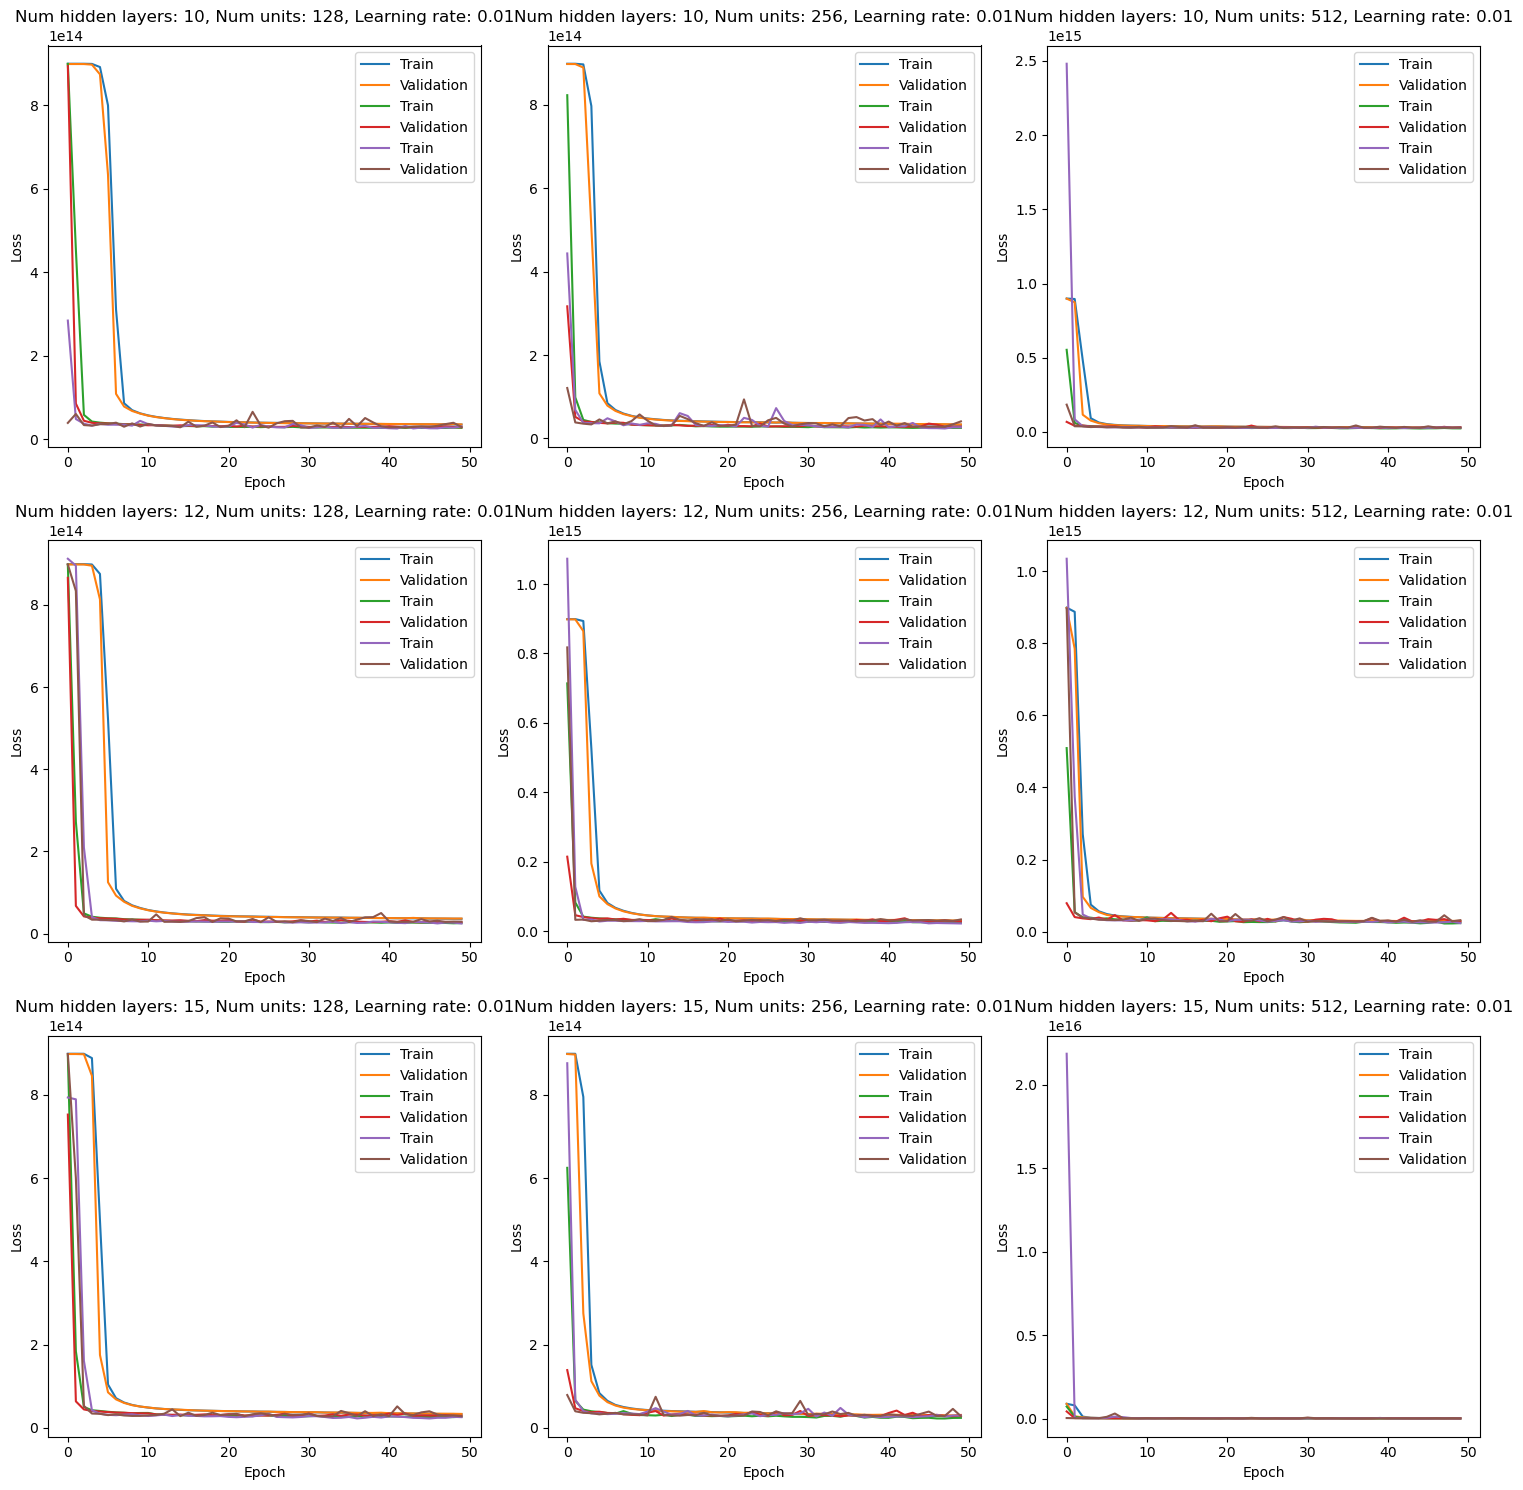

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Scale the input features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define the model
def create_model(num_hidden_layers, num_units, learning_rate):
    model = Sequential()
    model.add(Dense(units=num_units, activation='relu', input_dim=X_train.shape[1]))
    for i in range(num_hidden_layers):
        model.add(Dense(units=num_units, activation='relu'))
    model.add(Dense(units=1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Define the hyperparameter grid
param_grid = {
    'num_hidden_layers': [10, 12, 15],
    'num_units': [128, 256, 512],
    'learning_rate': [0.0001, 0.001, 0.01]
}

# Define the number of epochs and batch size
epochs = 50
batch_size = 128

# Define arrays to store training and validation losses
train_losses = np.zeros((len(param_grid['num_hidden_layers']), len(param_grid['num_units']), len(param_grid['learning_rate']), epochs))
val_losses = np.zeros((len(param_grid['num_hidden_layers']), len(param_grid['num_units']), len(param_grid['learning_rate']), epochs))

# Train models with different hyperparameters
for i, num_hidden_layers in enumerate(param_grid['num_hidden_layers']):
    for j, num_units in enumerate(param_grid['num_units']):
        for k, learning_rate in enumerate(param_grid['learning_rate']):
            model = create_model(num_hidden_layers=num_hidden_layers, num_units=num_units, learning_rate=learning_rate)
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, validation_data=(X_val, y_val))
            train_losses[i, j, k, :] = history.history['loss']
            val_losses[i, j, k, :] = history.history['val_loss']

# Find the best hyperparameters
min_val_loss_idx = np.unravel_index(np.argmin(val_losses), val_losses.shape)
best_num_hidden_layers = param_grid['num_hidden_layers'][min_val_loss_idx[0]]
best_num_units = param_grid['num_units'][min_val_loss_idx[1]]
best_learning_rate = param_grid['learning_rate'][min_val_loss_idx[2]]

# Print the best parameters and score
print("Best parameters: ")
print("num_hidden_layers: ", best_num_hidden_layers)
print("num_units: ", best_num_units)
print("learning_rate: ", best_learning_rate)
print("Best validation loss:", min_val_loss_idx)

# Train a new model with the best hyperparameters on the combined training and validation sets
model = create_model(num_hidden_layers=best_num_hidden_layers, num_units=best_num_units, learning_rate=best_learning_rate)
history = model.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]), epochs=epochs, batch_size=batch_size, verbose=0)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the r2 and RMSE scores
print("R-squared score on the test set:", r2)
print("RMSE score on the test set:", rmse)


fig, axes = plt.subplots(len(param_grid['num_hidden_layers']), len(param_grid['num_units']), figsize=(15, 15))
for i, num_hidden_layers in enumerate(param_grid['num_hidden_layers']):
    for j, num_units in enumerate(param_grid['num_units']):
        for k, learning_rate in enumerate(param_grid['learning_rate']):
            ax = axes[i][j]
            ax.plot(train_losses[i, j, k], label='Train')
            ax.plot(val_losses[i, j, k], label='Validation')
            ax.set_xlabel('Epoch')
            ax.set_ylabel('Loss')
            ax.set_title(f'Num hidden layers: {num_hidden_layers}, Num units: {num_units}, Learning rate: {learning_rate}')
            ax.legend()
plt.tight_layout()
plt.show()

Best parameters: 
num_hidden_layers:  15
num_units:  256
learning_rate:  0.001
Best validation loss: (2, 2, 1, 34)
45/45 [==============================] - 0s 2ms/step
R-squared score on the test set: 0.7548667674334466
RMSE score on the test set: 5467949.011423991


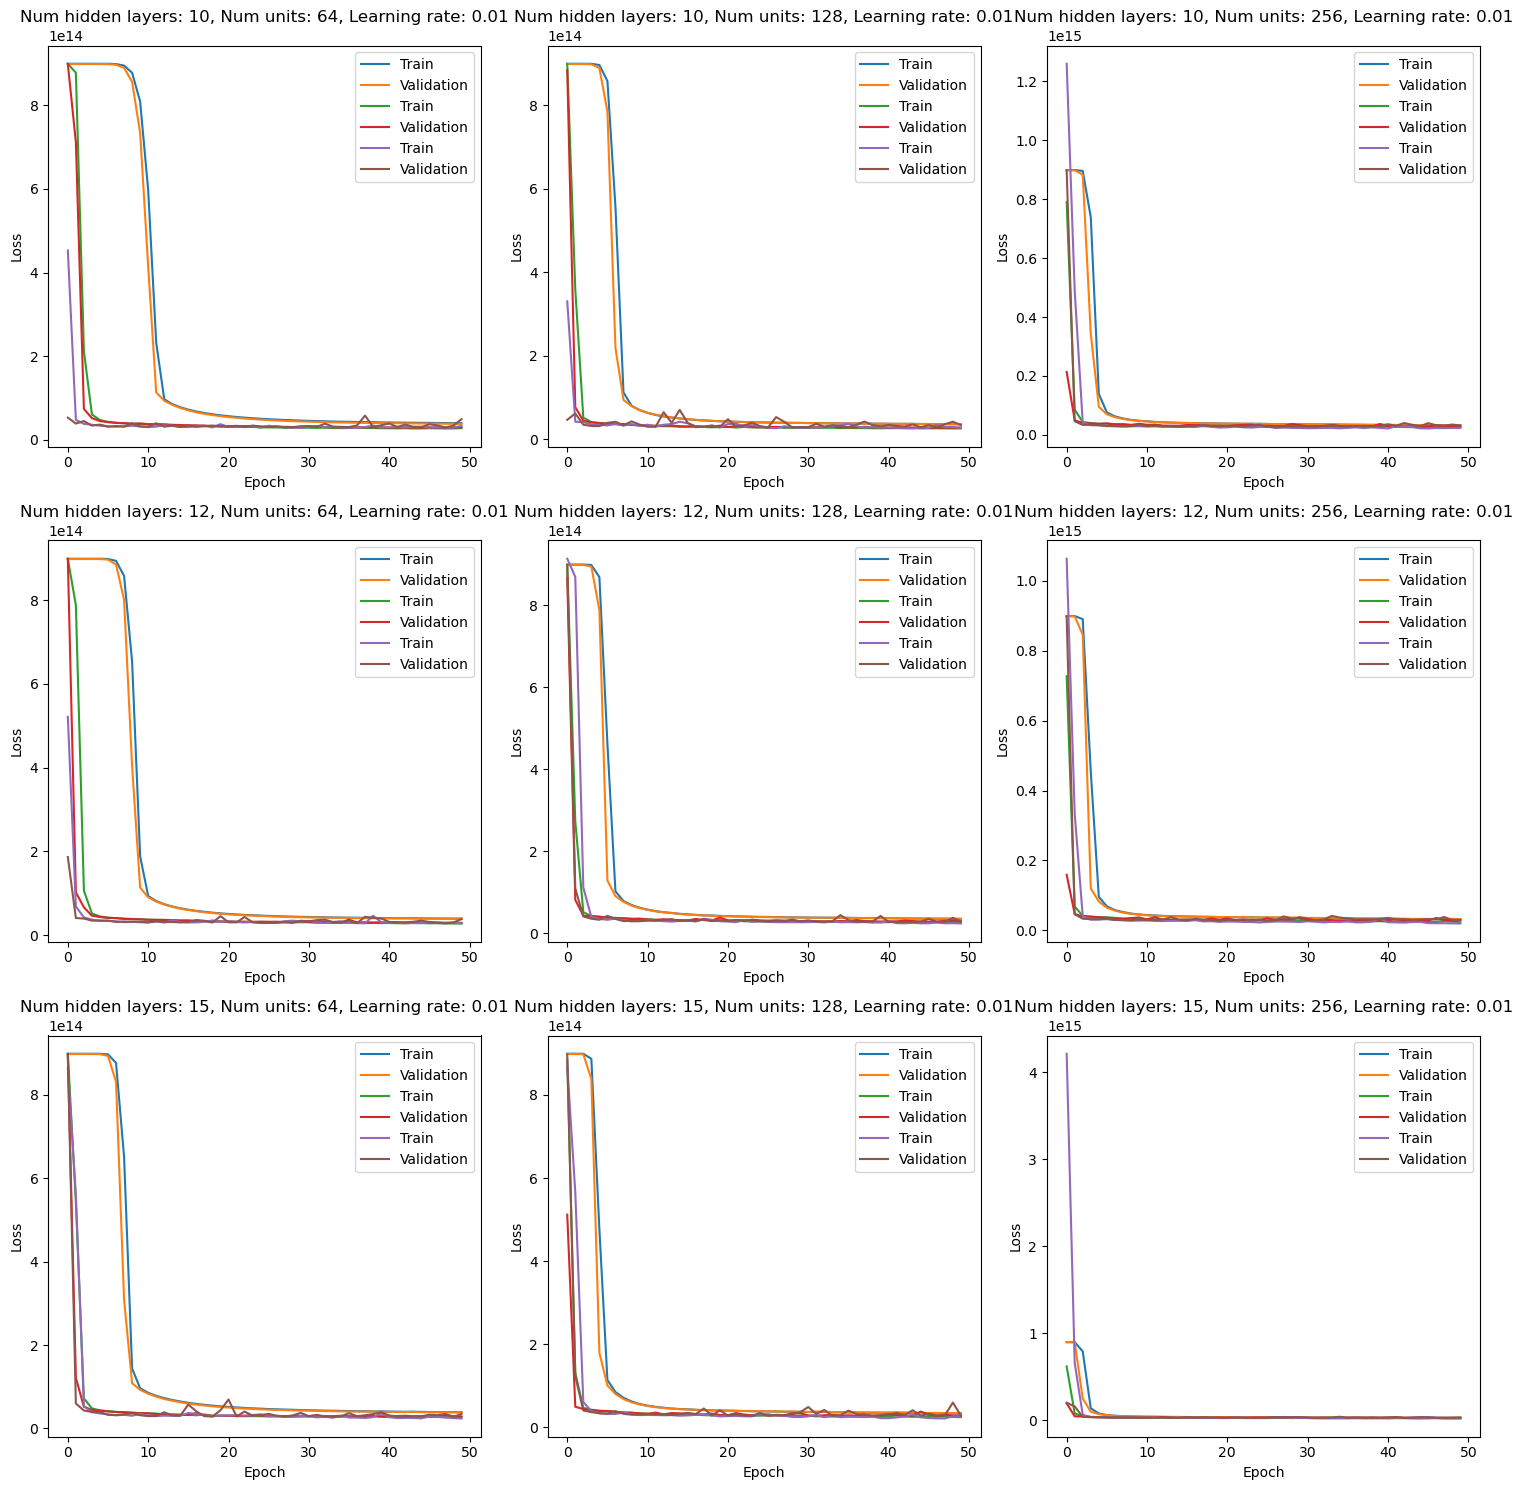

In [92]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Scale the input features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define the model
def create_model(num_hidden_layers, num_units, learning_rate):
    model = Sequential()
    model.add(Dense(units=num_units, activation='relu', input_dim=X_train.shape[1]))
    for i in range(num_hidden_layers):
        model.add(Dense(units=num_units, activation='relu'))
    model.add(Dense(units=1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Define the hyperparameter grid
param_grid = {
    'num_hidden_layers': [10, 12, 15],
    'num_units': [64, 128, 256],
    'learning_rate': [0.0001, 0.001, 0.01]
}

# Define the number of epochs and batch size
epochs = 50
batch_size = 128

# Define arrays to store training and validation losses
train_losses = np.zeros((len(param_grid['num_hidden_layers']), len(param_grid['num_units']), len(param_grid['learning_rate']), epochs))
val_losses = np.zeros((len(param_grid['num_hidden_layers']), len(param_grid['num_units']), len(param_grid['learning_rate']), epochs))

# Train models with different hyperparameters
for i, num_hidden_layers in enumerate(param_grid['num_hidden_layers']):
    for j, num_units in enumerate(param_grid['num_units']):
        for k, learning_rate in enumerate(param_grid['learning_rate']):
            model = create_model(num_hidden_layers=num_hidden_layers, num_units=num_units, learning_rate=learning_rate)
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, validation_data=(X_val, y_val))
            train_losses[i, j, k, :] = history.history['loss']
            val_losses[i, j, k, :] = history.history['val_loss']

# Find the best hyperparameters
min_val_loss_idx = np.unravel_index(np.argmin(val_losses), val_losses.shape)
best_num_hidden_layers = param_grid['num_hidden_layers'][min_val_loss_idx[0]]
best_num_units = param_grid['num_units'][min_val_loss_idx[1]]
best_learning_rate = param_grid['learning_rate'][min_val_loss_idx[2]]

# Print the best parameters and score
print("Best parameters: ")
print("num_hidden_layers: ", best_num_hidden_layers)
print("num_units: ", best_num_units)
print("learning_rate: ", best_learning_rate)
print("Best validation loss:", min_val_loss_idx)

# Train a new model with the best hyperparameters on the combined training and validation sets
model = create_model(num_hidden_layers=best_num_hidden_layers, num_units=best_num_units, learning_rate=best_learning_rate)
history = model.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]), epochs=epochs, batch_size=batch_size, verbose=0)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the r2 and RMSE scores
print("R-squared score on the test set:", r2)
print("RMSE score on the test set:", rmse)


fig, axes = plt.subplots(len(param_grid['num_hidden_layers']), len(param_grid['num_units']), figsize=(15, 15))
for i, num_hidden_layers in enumerate(param_grid['num_hidden_layers']):
    for j, num_units in enumerate(param_grid['num_units']):
        for k, learning_rate in enumerate(param_grid['learning_rate']):
            ax = axes[i][j]
            ax.plot(train_losses[i, j, k], label='Train')
            ax.plot(val_losses[i, j, k], label='Validation')
            ax.set_xlabel('Epoch')
            ax.set_ylabel('Loss')
            ax.set_title(f'Num hidden layers: {num_hidden_layers}, Num units: {num_units}, Learning rate: {learning_rate}')
            ax.legend()
plt.tight_layout()
plt.show()

In [70]:
boxplot_almaty = housing[(housing['price']) & (housing['zone_Алматы'] == 1)].reset_index()
boxplot_almaty.head()

,index,year,n_floor,total_floor,area,ceiling,toilet,parking,rough_finish,num_room,price,building_type_кирпичный,building_type_монолитный,building_type_панельный,zone_Алматы,zone_Есильский,zone_Сарыарка,zone_р-нБайконур
0,146,2006,5.000000,10.000000,63,2.7,0,0,0,2,24999999,1,0,0,1,0,0,0
1,212,2021,2.000000,9.846911,47,3.0,0,0,1,2,23999999,1,0,0,1,0,0,0
2,461,2018,4.000000,9.000000,90,2.8,0,0,0,3,47599999,0,1,0,1,0,0,0
3,527,2017,4.912506,9.846911,68,3.3,0,1,0,2,46999999,0,1,0,1,0,0,0
4,555,2014,1.000000,9.000000,73,2.7,0,1,0,3,28199999,0,1,0,1,0,0,0


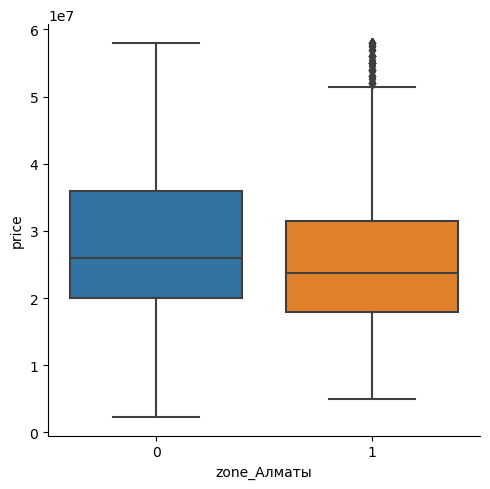

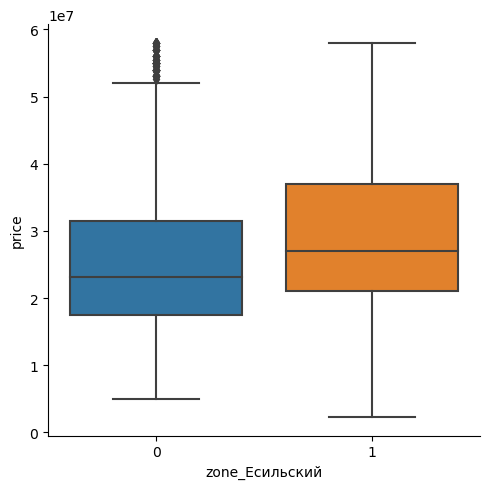

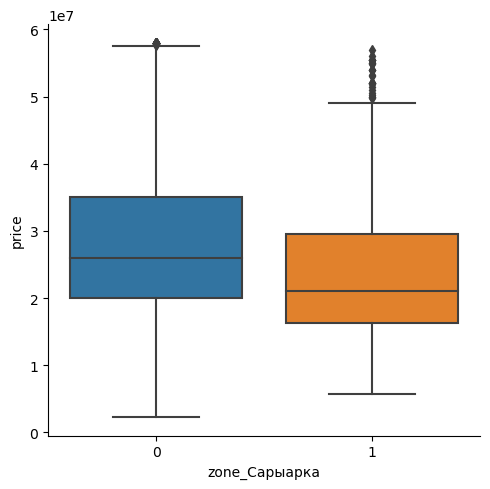

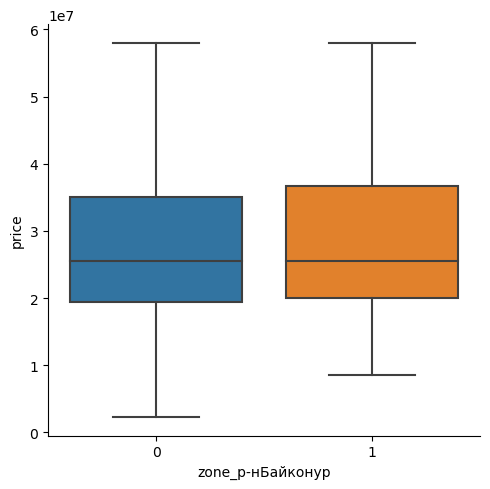

In [55]:
sns.catplot(x='zone_Алматы', y='price', data=housing, kind='box')
sns.catplot(x='zone_Есильский', y='price', data=housing, kind='box')
sns.catplot(x='zone_Сарыарка', y='price', data=housing, kind='box')
sns.catplot(x='zone_р-нБайконур', y='price', data=housing, kind='box')
plt.show()

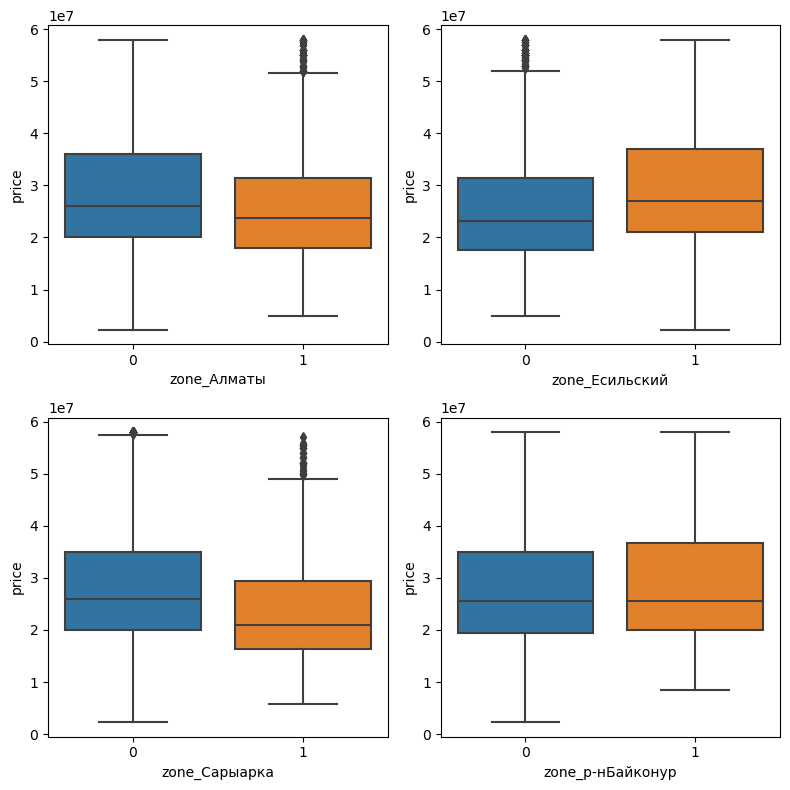

In [50]:
# Create a figure with 2 rows and 2 columns
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# Create a boxplot for each zone in a different subplot
sns.boxplot(x='zone_Алматы', y='price', data=housing, ax=axs[0, 0])
sns.boxplot(x='zone_Есильский', y='price', data=housing, ax=axs[0, 1])
sns.boxplot(x='zone_Сарыарка', y='price', data=housing, ax=axs[1, 0])
sns.boxplot(x='zone_р-нБайконур', y='price', data=housing, ax=axs[1, 1])

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

AttributeError: 'bool' object has no attribute 'all'

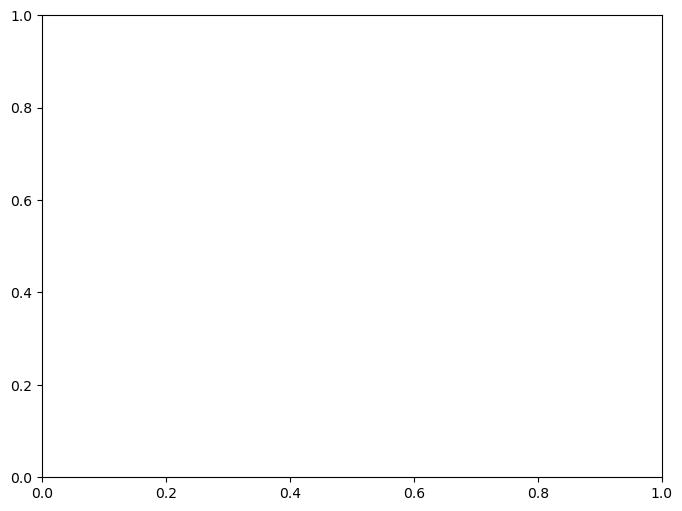

In [75]:
# Select rows where 'zone_Алматы' equals 1 using loc
boxplot_almaty = housing.loc[housing['zone_Алматы'] == 1, 'price']

# Create a figure with 1 row and 1 column
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

# Create a boxplot for the 'price' variable in the 'zone_Алматы' zone
sns.boxplot(x=1, y=boxplot_almaty, ax=axs)

# Set the x-axis label
axs.set_xlabel('Zone')

# Set the y-axis label
axs.set_ylabel('Price')

# Set the title of the plot
axs.set_title('Boxplot of Price in Алматы Zone')

# Show the plot
plt.show()


In [66]:
#zone_almaty_mean = housing['zone_Алматы']
#zone_almaty_mean.mean()
housing[(housing['price']) & (hosing['zone_A'])]

0.29560906515580737

In [73]:
mean_by_group = housing.groupby('zone_Алматы')['price'].mean()
print(mean_by_group)

zone_Алматы
0    2.874514e+07
1    2.567911e+07
Name: price, dtype: float64


In [51]:
mean_by_group = housing.groupby('zone_Алматы')['price'].mean() / 1000
print(mean_by_group)

zone_Алматы
0    28745.135875
1    25679.106081
Name: price, dtype: float64


In [52]:
housing.groupby('zone_Есильский')['price'].mean() / 1000

zone_Есильский
0    25541.465947
1    29777.325313
Name: price, dtype: float64

In [53]:
housing.groupby('zone_Сарыарка')['price'].mean() / 1000 

zone_Сарыарка
0    28337.560102
1    24084.759109
Name: price, dtype: float64

In [54]:
housing.groupby('zone_р-нБайконур')['price'].mean() / 1000

zone_р-нБайконур
0    27810.179946
1    28449.371972
Name: price, dtype: float64

In [79]:
housing.year.value_counts()

2022    1274
2023     840
2021     581
2018     567
2019     541
2016     406
2017     355
2020     272
2011     250
2015     234
2012     228
2010     228
2014     209
2007     175
2008     173
2009     160
2006     142
2013     124
2005      81
2004      54
2024      50
2002      24
1999      19
2003      19
2000      18
1998      18
2001      11
1997       7
Name: year, dtype: int64

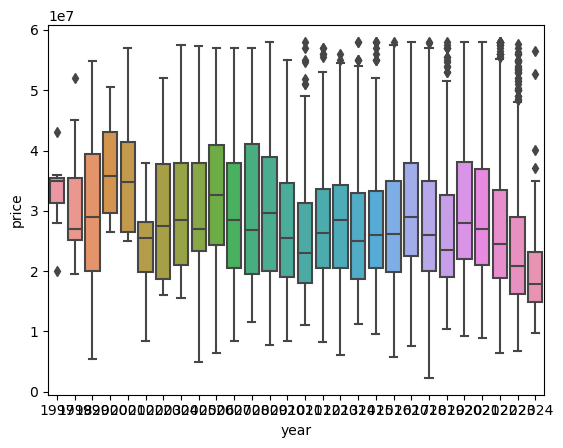

In [77]:
sns.boxplot(x='year', y='price', data=housing)
plt.show()

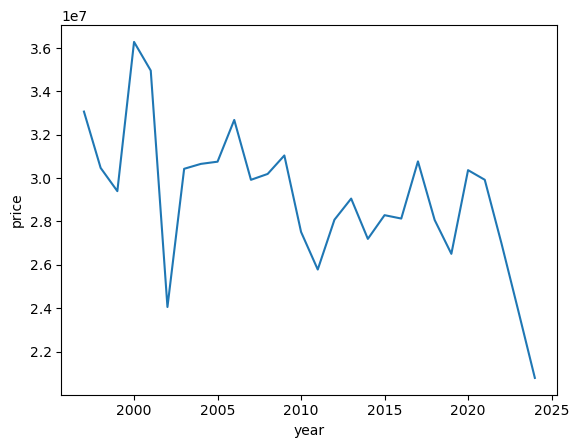

In [78]:
grouped_data = housing.groupby('year')['price'].mean().reset_index()

# plot the means as a line plot
sns.lineplot(x='year', y='price', data=grouped_data)
plt.show()

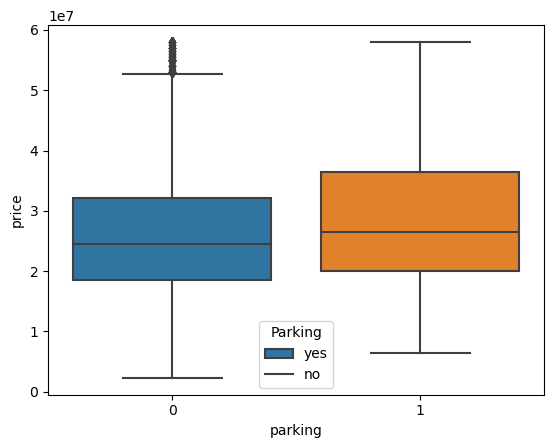

In [77]:
# Create a boxplot with 'parking' as x-axis and 'price' as y-axis
sns.boxplot(x='parking', y='price', data=housing)

# Set the labels for the legends
legend_labels = ['yes', 'no']

# Add legends to the plot
plt.legend(legend_labels, title='Parking')

# Display the plot
plt.show()


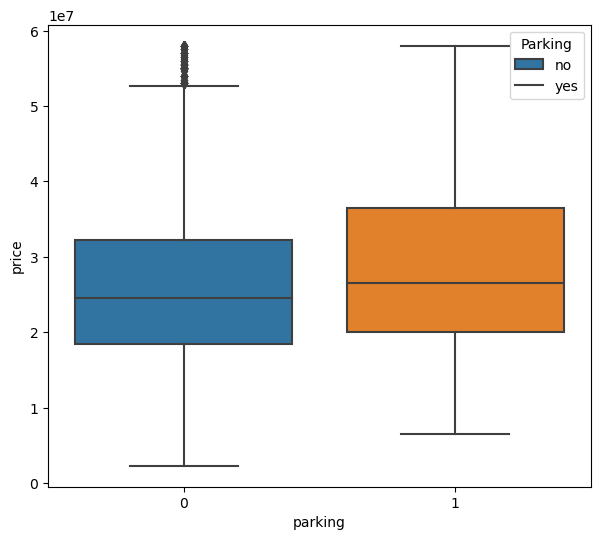

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(7, 6))

# Create a boxplot with 'parking' as x-axis and 'price' as y-axis
sns.boxplot(x='parking', y='price', data=housing)

# Set the labels for the legends
legend_labels = ['no', 'yes']

# Add legends to the plot
plt.legend(legend_labels, title='Parking')

# Display the plot
plt.show()


In [76]:
housing.groupby('parking')['price'].mean() / 1000

parking
0    26420.661392
1    29163.671165
Name: price, dtype: float64

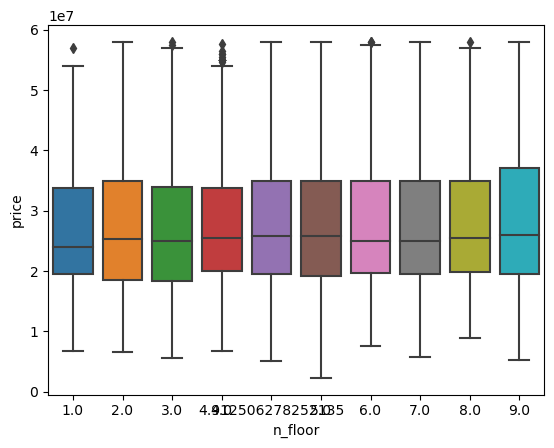

In [87]:
sns.boxplot(x='n_floor', y='price', data=housing)
plt.show()

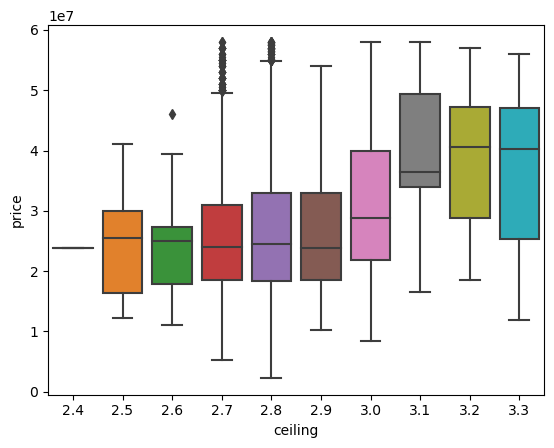

In [88]:
sns.boxplot(x='ceiling', y='price', data=housing)
plt.show()

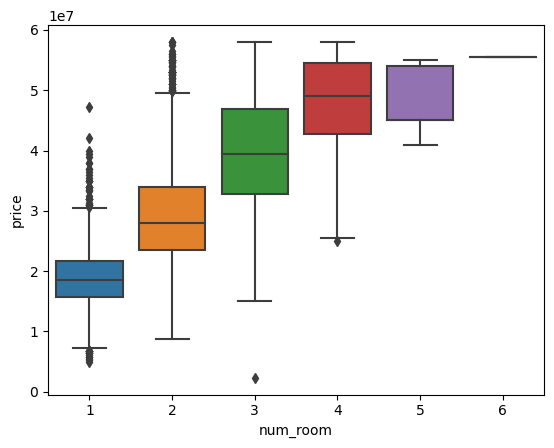

In [89]:
sns.boxplot(x='num_room', y='price', data=housing)
plt.show()